# Processing

Собираем данные из всех таблиц:

In [207]:
import pandas as pd
import glob
import os

path = r'C:\Users\hp\oil_gas_train_test' 
all_files = glob.glob(path+'\*.xlsx')
li = []
fea = ['Revenue','Gross Profit','Operating Income','Pretax Income',
       'Income (Loss) from Cont Ops','Net Income','Net Income Avail to Common',
      'EPS','Total Assets','Total Liabilities','Total Equity','Cash from Operations',
      'Cash from Investing Activities','Cash from Financing Activities']
for filename in all_files:
    df = pd.read_excel(filename, skiprows = 28, nrows=332,  usecols = 'I:AY',keep_default_na=True)
    df = df.set_index('INCOME STATEMENT')
    df = df.loc[fea]
    df = df.T
    company = filename.strip(r'C:\Users\hp\oil_gas_train_test\ ').strip('.xlsx')
    df['Company'] = company
    df = df.reset_index()
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)
data

INCOME STATEMENT,index,Revenue,Gross Profit,Operating Income,Pretax Income,Income (Loss) from Cont Ops,Net Income,Net Income,Net Income,Net Income Avail to Common,EPS,Total Assets,Total Assets,Total Liabilities,Total Liabilities,Total Equity,Cash from Operations,Cash from Investing Activities,Cash from Financing Activities,Company
0,2011-03-31,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,0,0,0,AMPY
1,2011-06-30,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,0,0,0,AMPY
2,2011-09-30,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,0,0,0,AMPY
3,2011-12-31,61.863,25.009,-32.289,-33.64,-56.351,-41.5888,-56.351,-41.5888,-41.5888,0,624.656,NaN,339.154,NaN,285.502,38.239,-79.88,38.765,AMPY
4,2012-03-31,48.41,13.782,2.342,0.659,-17.507,-5.6991,-17.507,-5.6991,-5.6991,-0.086831,688.609,NaN,420.614,0,267.995,34.316,-72.466,40,AMPY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2020-06-30,63.129,-73.46,-174.478,-67.325,-291.934,-114.493,-291.934,-124.312,-124.312,-0.899748,2404.36,NaN,2270.96,0,133.395,-63.145,-51.71,145.415,XOG
2180,2020-09-30,158.226,8.65701,-22.476,-15.816,-540.607,-126.022,-540.607,-127.887,-127.887,-0.924387,2370.57,NaN,2775.88,0,-405.31,65.099,-25.236,18.749,XOG
2181,2020-12-31,171.362,22.454,-63.473,-63.636,-444.03,-141.781,-444.03,-141.781,-141.781,-1.02478,2025.2,NaN,2872.49,0,-847.291,116.922,-28.452,-3.745,XOG
2182,2021-03-31,292.484,170.388,154.564,139.381,959.524,293.184,959.524,NaN,293.184,1.80882,1332.12,NaN,696.66,0,635.463,164.454,-31.819,-274.454,XOG


In [208]:
#запишем всё в новый экслелевский файл, иначе ниже при удалении 
#некоторых столбцов вылезет ошибка (видимо она появилась из-за того, что в файлах присутствуют скрытые строчки)
data.to_excel('rf.xlsx', index=None)

In [209]:
df = pd.read_excel('rf.xlsx')
df

,index,Revenue,Gross Profit,Operating Income,Pretax Income,Income (Loss) from Cont Ops,Net Income,Net Income.1,Net Income.2,Net Income Avail to Common,EPS,Total Assets,Total Assets.1,Total Liabilities,Total Liabilities.1,Total Equity,Cash from Operations,Cash from Investing Activities,Cash from Financing Activities,Company
0,2011-03-31,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000,0.000,0.000000,AMPY
1,2011-06-30,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000,0.000,0.000000,AMPY
2,2011-09-30,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000,0.000,0.000000,AMPY
3,2011-12-31,61.863000,25.009000,-32.289,-33.640000,-56.351000,-41.588848,-56.351000,-41.588848,-41.588848,0.000000,624.656000,NaN,339.154000,NaN,285.502016,38.239,-79.880,38.765000,AMPY
4,2012-03-31,48.410000,13.782000,2.342,0.659000,-17.507000,-5.699100,-17.507000,-5.699100,-5.699100,-0.086831,688.609024,NaN,420.614000,0.0,267.995008,34.316,-72.466,40.000000,AMPY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2020-06-30,63.129000,-73.459992,-174.478,-67.325000,-291.934016,-114.492888,-291.934016,-124.311888,-124.311888,-0.899748,2404.356096,NaN,2270.960960,0.0,133.395040,-63.145,-51.710,145.415008,XOG
2180,2020-09-30,158.226000,8.657008,-22.476,-15.816000,-540.606976,-126.022112,-540.606976,-127.887112,-127.887112,-0.924387,2370.571008,NaN,2775.881024,0.0,-405.309952,65.099,-25.236,18.749000,XOG
2181,2020-12-31,171.362000,22.454000,-63.473,-63.636000,-444.030016,-141.780736,-444.030016,-141.780736,-141.780736,-1.024775,2025.198976,NaN,2872.490112,0.0,-847.290864,116.922,-28.452,-3.745000,XOG
2182,2021-03-31,292.484000,170.388000,154.564,139.380992,959.523968,293.184288,959.523968,NaN,293.184288,1.808819,1332.123008,NaN,696.660000,0.0,635.462992,164.454,-31.819,-274.454016,XOG


# EDA

In [210]:
df.columns

Index(['index', 'Revenue', 'Gross Profit', 'Operating Income', 'Pretax Income',
       'Income (Loss) from Cont Ops', 'Net Income', 'Net Income.1',
       'Net Income.2', 'Net Income Avail to Common', 'EPS', 'Total Assets',
       'Total Assets.1', 'Total Liabilities', 'Total Liabilities.1',
       'Total Equity', 'Cash from Operations',
       'Cash from Investing Activities', 'Cash from Financing Activities',
       'Company'],
      dtype='object')

In [211]:
df1 = df.drop(df.columns[[5,7, 8,9, 12,14]], axis=1) #удаляем не особо интересные столбцы
df1

,index,Revenue,Gross Profit,Operating Income,Pretax Income,Net Income,EPS,Total Assets,Total Liabilities,Total Equity,Cash from Operations,Cash from Investing Activities,Cash from Financing Activities,Company
0,2011-03-31,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,AMPY
1,2011-06-30,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,AMPY
2,2011-09-30,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,AMPY
3,2011-12-31,61.863000,25.009000,-32.289,-33.640000,-41.588848,0.000000,624.656000,339.154000,285.502016,38.239,-79.880,38.765000,AMPY
4,2012-03-31,48.410000,13.782000,2.342,0.659000,-5.699100,-0.086831,688.609024,420.614000,267.995008,34.316,-72.466,40.000000,AMPY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2020-06-30,63.129000,-73.459992,-174.478,-67.325000,-114.492888,-0.899748,2404.356096,2270.960960,133.395040,-63.145,-51.710,145.415008,XOG
2180,2020-09-30,158.226000,8.657008,-22.476,-15.816000,-126.022112,-0.924387,2370.571008,2775.881024,-405.309952,65.099,-25.236,18.749000,XOG
2181,2020-12-31,171.362000,22.454000,-63.473,-63.636000,-141.780736,-1.024775,2025.198976,2872.490112,-847.290864,116.922,-28.452,-3.745000,XOG
2182,2021-03-31,292.484000,170.388000,154.564,139.380992,293.184288,1.808819,1332.123008,696.660000,635.462992,164.454,-31.819,-274.454016,XOG


In [212]:
df1 = df1.rename(columns={'index':'date'})
df1 = df1.set_index('date')

In [213]:
#создаём колонки с таргетом
df1['Revenue_pred'] = df1.groupby('Company')['Revenue'].shift(-1)
df1['Income_pred'] = df1.groupby('Company')['Operating Income'].shift(-1)

In [214]:
df_train = df1.loc[df1.index.values[:37],:].reset_index().sort_values(by=['Company','date']).set_index('date')
df_test = df1.loc[df1.index.values[37:],:].reset_index().sort_values(by=['Company','date']).set_index('date')
df_train

,Revenue,Gross Profit,Operating Income,Pretax Income,Net Income,EPS,Total Assets,Total Liabilities,Total Equity,Cash from Operations,Cash from Investing Activities,Cash from Financing Activities,Company,Revenue_pred,Income_pred
date,,,,,,,,,,,,,,,
2011-03-31,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,AMPY,0.000000,0.000
2011-06-30,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,AMPY,0.000000,0.000
2011-09-30,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,AMPY,61.863000,-32.289
2011-12-31,61.863000,25.009000,-32.289,-33.640000,-41.588848,0.000000,624.656000,339.154000,285.502016,38.239000,-79.880000,38.765,AMPY,48.410000,2.342
2012-03-31,48.410000,13.782000,2.342,0.659000,-5.699100,-0.086831,688.609024,420.614000,267.995008,34.316000,-72.466000,40.000,AMPY,49.259000,4.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-31,232.246000,63.125008,29.279,17.414000,12.945340,0.050546,4096.998912,2154.366944,1942.632096,134.111000,-232.375008,-23.951,XOG,236.260000,19.823
2019-06-30,236.260000,63.850000,19.823,2.116000,-5.231120,-0.060160,4252.549120,2338.638944,1913.910080,84.333000,-216.868992,55.672,XOG,176.942000,-18.356
2019-09-30,176.942000,22.334000,-18.356,-24.142000,-29.416140,-0.245442,4429.157888,2383.755936,2045.401872,138.116992,-257.624000,141.328,XOG,230.844000,-87.464


In [215]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1916 entries, 2011-03-31 to 2020-03-31
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Revenue                         1916 non-null   float64
 1   Gross Profit                    1916 non-null   float64
 2   Operating Income                1916 non-null   float64
 3   Pretax Income                   1916 non-null   float64
 4   Net Income                      1916 non-null   float64
 5   EPS                             1916 non-null   float64
 6   Total Assets                    1916 non-null   float64
 7   Total Liabilities               1916 non-null   float64
 8   Total Equity                    1916 non-null   float64
 9   Cash from Operations            1916 non-null   float64
 10  Cash from Investing Activities  1916 non-null   float64
 11  Cash from Financing Activities  1916 non-null   float64
 12  Company         

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_train = df_train.replace({'0':np.nan, 0:np.nan})
df_train

,Revenue,Gross Profit,Operating Income,Pretax Income,Net Income,EPS,Total Assets,Total Liabilities,Total Equity,Cash from Operations,Cash from Investing Activities,Cash from Financing Activities,Company,Revenue_pred,Income_pred
date,,,,,,,,,,,,,,,
2011-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMPY,NaN,NaN
2011-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMPY,NaN,NaN
2011-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMPY,61.863000,-32.289
2011-12-31,61.863000,25.009000,-32.289,-33.640000,-41.588848,NaN,624.656000,339.154000,285.502016,38.239000,-79.880000,38.765,AMPY,48.410000,2.342
2012-03-31,48.410000,13.782000,2.342,0.659000,-5.699100,-0.086831,688.609024,420.614000,267.995008,34.316000,-72.466000,40.000,AMPY,49.259000,4.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-31,232.246000,63.125008,29.279,17.414000,12.945340,0.050546,4096.998912,2154.366944,1942.632096,134.111000,-232.375008,-23.951,XOG,236.260000,19.823
2019-06-30,236.260000,63.850000,19.823,2.116000,-5.231120,-0.060160,4252.549120,2338.638944,1913.910080,84.333000,-216.868992,55.672,XOG,176.942000,-18.356
2019-09-30,176.942000,22.334000,-18.356,-24.142000,-29.416140,-0.245442,4429.157888,2383.755936,2045.401872,138.116992,-257.624000,141.328,XOG,230.844000,-87.464


In [217]:
df_train.groupby('Company')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
AMPY,34.0,88.108470,39.938381,48.410000,56.695250,69.057000,109.105500,166.518000
APA,37.0,2584.189191,1242.134938,1084.000000,1526.000000,1872.000000,3921.999872,4496.000000
AR,34.0,657.956852,349.468652,92.034000,421.062992,691.975008,951.609504,1242.779008
BATL,37.0,138.883650,99.732188,24.197000,51.916000,120.137000,243.943008,311.999008
BCEI,37.0,74.981866,34.539640,21.436696,51.585424,66.058000,99.656000,155.376992
BRY,10.0,163.760198,87.953166,65.982000,102.495000,147.660000,188.520500,339.264992
BSM,22.0,116.492500,41.166258,64.803000,87.602750,104.783000,136.165500,246.047008
DEN,37.0,442.098136,154.563538,234.242000,311.568000,452.907008,601.585024,672.880000
DEV,17.0,152.086177,89.681521,23.750000,60.700000,192.716000,222.926000,252.944000


Видно, что по некоторым компаниям очень мало данных. Посмотрим в каких столбцах находятся пропуски

In [167]:
df_train.isnull().sum()

Revenue                           201
Gross Profit                      221
Operating Income                  201
Pretax Income                     201
Net Income                        200
EPS                               230
Total Assets                      199
Total Liabilities                 199
Total Equity                      199
Cash from Operations              205
Cash from Investing Activities    212
Cash from Financing Activities    234
Company                             0
Revenue_pred                      187
Income_pred                       187
dtype: int64

In [168]:
missing_data = 100*(df_train.isnull().sum() / df_train.shape[0]).round(3)
missing_data

Revenue                           10.5
Gross Profit                      11.5
Operating Income                  10.5
Pretax Income                     10.5
Net Income                        10.4
EPS                               12.0
Total Assets                      10.4
Total Liabilities                 10.4
Total Equity                      10.4
Cash from Operations              10.7
Cash from Investing Activities    11.1
Cash from Financing Activities    12.2
Company                            0.0
Revenue_pred                       9.8
Income_pred                        9.8
dtype: float64

Пропуски распределены довольно равномерно, отсюда вывод, что пропущены не отдельные значения, а целые строки (что логично). Глянем на одну из компаний с большим количеством пропусков.

In [169]:
df_train.loc[df_train['Company'] == 'MNRL']

,Revenue,Gross Profit,Operating Income,Pretax Income,Net Income,EPS,Total Assets,Total Liabilities,Total Equity,Cash from Operations,Cash from Investing Activities,Cash from Financing Activities,Company,Revenue_pred,Income_pred
date,,,,,,,,,,,,,,,
2011-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MNRL,NaN,NaN
2011-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MNRL,NaN,NaN
2011-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MNRL,NaN,NaN
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MNRL,NaN,NaN
2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MNRL,NaN,NaN
2012-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MNRL,NaN,NaN
2012-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MNRL,NaN,NaN
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MNRL,NaN,NaN
2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MNRL,NaN,NaN


Всё плохо, удаляем данные по таким компаниям целиком, т.к. тут даже замена средним значениями не будет давать правдоподобную картину

In [170]:
df_train = df_train[(df_train['Company'] !='BRY') & (df_train['Company'] !='MGY') & (df_train['Company'] != 'MNRL')]

In [171]:
missing_data = 100*(df_train.isnull().sum() / df_train.shape[0]).round(3)
missing_data

Revenue                           6.4
Gross Profit                      6.9
Operating Income                  6.5
Pretax Income                     6.5
Net Income                        6.4
EPS                               8.0
Total Assets                      6.3
Total Liabilities                 6.3
Total Equity                      6.3
Cash from Operations              6.6
Cash from Investing Activities    7.0
Cash from Financing Activities    8.1
Company                           0.0
Revenue_pred                      5.8
Income_pred                       5.9
dtype: float64

Пропуски всё ещё есть. Посмотрим, может они приходятся на определённые даты:

In [218]:
df_train.isnull().sum(axis=1).groupby('date').sum()/16

date
2011-03-31    11.5000
2011-06-30    11.3750
2011-09-30     9.7500
2011-12-31     8.8125
2012-03-31     8.8750
2012-06-30     8.8125
2012-09-30     8.9375
2012-12-31     8.6250
2013-03-31     8.1250
2013-06-30     7.9375
2013-09-30     7.9375
2013-12-31     7.3750
2014-03-31     7.0625
2014-06-30     6.6875
2014-09-30     6.1875
2014-12-31     5.5000
2015-03-31     5.2500
2015-06-30     5.3125
2015-09-30     5.3750
2015-12-31     5.2500
2016-03-31     3.0625
2016-06-30     2.8125
2016-09-30     2.8750
2016-12-31     2.5625
2017-03-31     2.2500
2017-06-30     2.1250
2017-09-30     2.1250
2017-12-31     1.9375
2018-03-31     1.0625
2018-06-30     1.0000
2018-09-30     1.0625
2018-12-31     1.0000
2019-03-31     0.2500
2019-06-30     0.2500
2019-09-30     0.2500
2019-12-31     0.2500
2020-03-31     0.1875
dtype: float64

Отчасти да, но количество компаний, у которых есть пропуски даже на 2011-03-31 (максимальное количество пропусков) не превышает 12, так что можем ничего не вырезать, а просто заполнить пропуски средним:

In [173]:
df_train.columns

Index(['Revenue', 'Gross Profit', 'Operating Income', 'Pretax Income',
       'Net Income', 'EPS', 'Total Assets', 'Total Liabilities',
       'Total Equity', 'Cash from Operations',
       'Cash from Investing Activities', 'Cash from Financing Activities',
       'Company', 'Revenue_pred', 'Income_pred'],
      dtype='object')

In [175]:
t = ['Revenue', 'Gross Profit', 'Operating Income', 'Pretax Income',
        'Net Income',
        'EPS', 'Total Assets',
       'Total Liabilities', 'Total Equity', 'Cash from Operations',
       'Cash from Investing Activities', 'Cash from Financing Activities', 'Revenue_pred', 'Income_pred']
for col in t:
    df_train[col].fillna(df_train[col].mean(), inplace=True)


In [176]:
missing_data = 100*(df_train.isnull().sum() / df_train.shape[0]).round(3)
missing_data

Revenue                           0.0
Gross Profit                      0.0
Operating Income                  0.0
Pretax Income                     0.0
Net Income                        0.0
EPS                               0.0
Total Assets                      0.0
Total Liabilities                 0.0
Total Equity                      0.0
Cash from Operations              0.0
Cash from Investing Activities    0.0
Cash from Financing Activities    0.0
Company                           0.0
Revenue_pred                      0.0
Income_pred                       0.0
dtype: float64

Для EPS ещё добавим бинарную переменную:

In [177]:
df_train['EPS_bin'] = [1 if row['EPS'] > 0 else 0 for _,row in df_train.iterrows()]
df_train

<ipython-input-177-afc1139cddee>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Revenue,Gross Profit,Operating Income,Pretax Income,Net Income,EPS,Total Assets,Total Liabilities,Total Equity,Cash from Operations,Cash from Investing Activities,Cash from Financing Activities,Company,Revenue_pred,Income_pred,EPS_bin
date,,,,,,,,,,,,,,,,
2011-03-31,930.819118,318.680422,160.003958,132.800868,70.752806,0.335217,10777.173575,5826.450588,4950.835900,342.680653,-344.590969,-7.123401,AMPY,879.662494,147.288406,1
2011-06-30,930.819118,318.680422,160.003958,132.800868,70.752806,0.335217,10777.173575,5826.450588,4950.835900,342.680653,-344.590969,-7.123401,AMPY,879.662494,147.288406,1
2011-09-30,930.819118,318.680422,160.003958,132.800868,70.752806,0.335217,10777.173575,5826.450588,4950.835900,342.680653,-344.590969,-7.123401,AMPY,61.863000,-32.289000,1
2011-12-31,61.863000,25.009000,-32.289000,-33.640000,-41.588848,0.335217,624.656000,339.154000,285.502016,38.239000,-79.880000,38.765000,AMPY,48.410000,2.342000,1
2012-03-31,48.410000,13.782000,2.342000,0.659000,-5.699100,-0.086831,688.609024,420.614000,267.995008,34.316000,-72.466000,40.000000,AMPY,49.259000,4.064000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-31,232.246000,63.125008,29.279000,17.414000,12.945340,0.050546,4096.998912,2154.366944,1942.632096,134.111000,-232.375008,-23.951000,XOG,236.260000,19.823000,1
2019-06-30,236.260000,63.850000,19.823000,2.116000,-5.231120,-0.060160,4252.549120,2338.638944,1913.910080,84.333000,-216.868992,55.672000,XOG,176.942000,-18.356000,0
2019-09-30,176.942000,22.334000,-18.356000,-24.142000,-29.416140,-0.245442,4429.157888,2383.755936,2045.401872,138.116992,-257.624000,141.328000,XOG,230.844000,-87.464000,0


Посмотрим, что у нас с корреляциями переменных:

<function matplotlib.pyplot.show(close=None, block=None)>

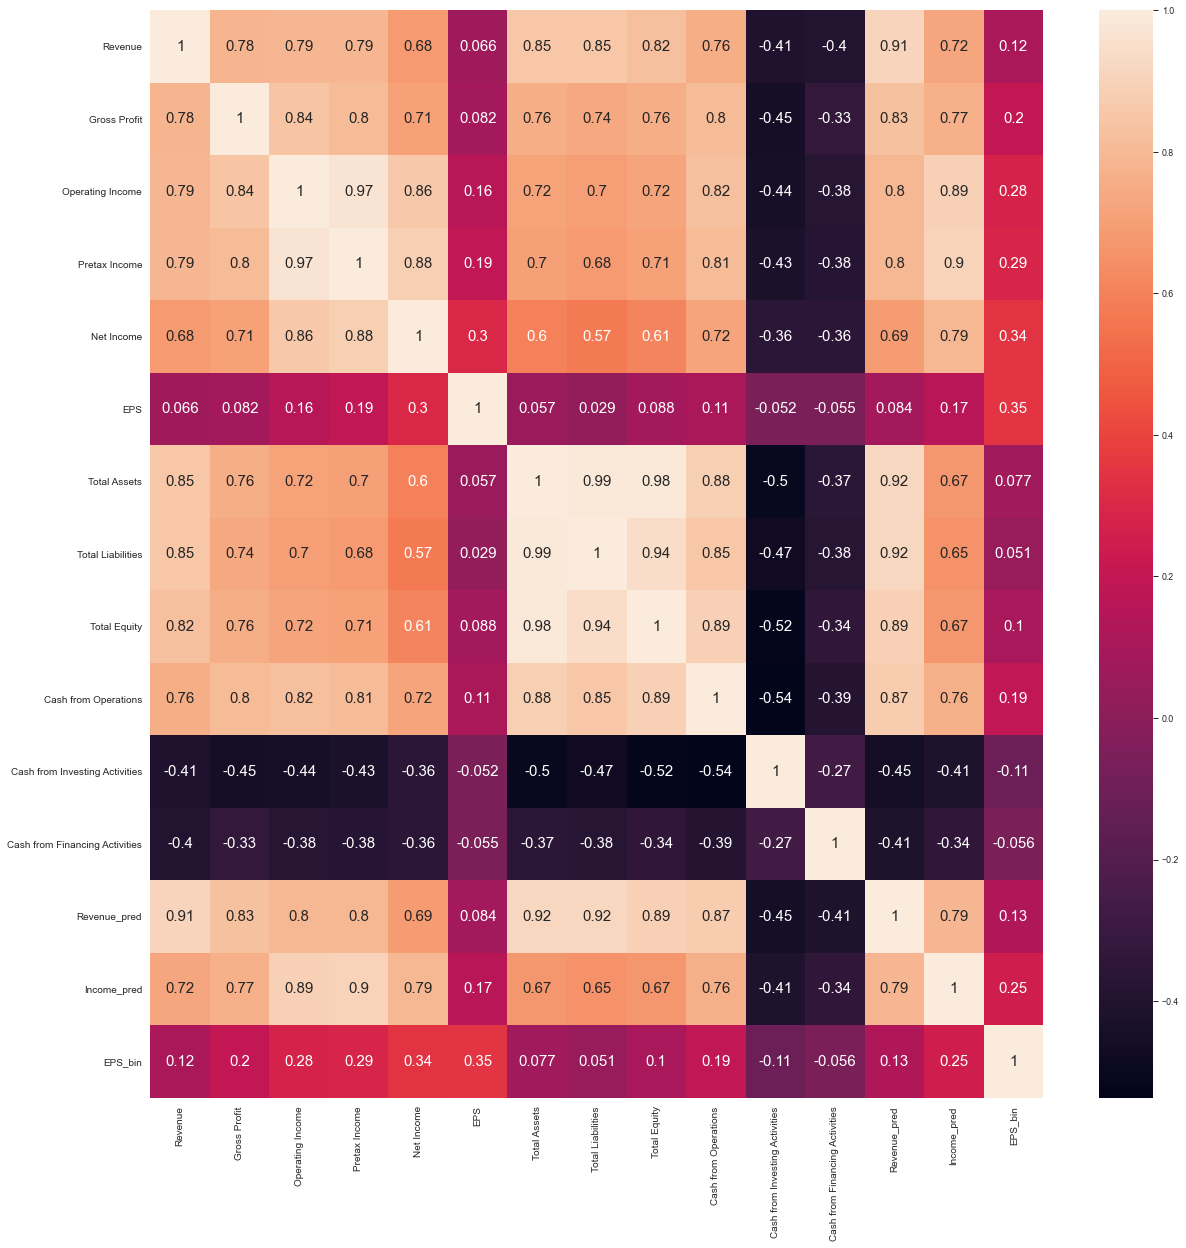

In [178]:
plt.figure(figsize = (20,20))
sns.heatmap(df_train.corr(), annot=True, annot_kws={'size':15})
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show

В целом, коррелирует почти всё со всем. Только EPS как относительная величина не показывает такой тенденции

Теперь построим графики по отдельным строкам отчётности:

# Revenue

In [179]:
measure = df_train.groupby('Company')['Revenue'].describe()
measure

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
AMPY,37.0,156.436361,236.313071,48.410000,58.136000,75.702000,142.434000,930.819118
APA,37.0,2584.189191,1242.134938,1084.000000,1526.000000,1872.000000,3921.999872,4496.000000
AR,37.0,680.080820,343.004949,92.034000,436.056992,735.811968,930.819118,1242.779008
BATL,37.0,138.883650,99.732188,24.197000,51.916000,120.137000,243.943008,311.999008
BCEI,37.0,74.981866,34.539640,21.436696,51.585424,66.058000,99.656000,155.376992
BSM,37.0,446.624913,406.542717,64.803000,103.028000,139.718000,930.819118,930.819118
DEN,37.0,442.098136,154.563538,234.242000,311.568000,452.907008,601.585024,672.880000
DEV,37.0,573.022902,397.954436,23.750000,214.192000,930.819118,930.819118,930.819118
DVN,37.0,2699.459463,865.829524,1079.000064,2160.999936,2510.000128,2868.000000,4800.999936


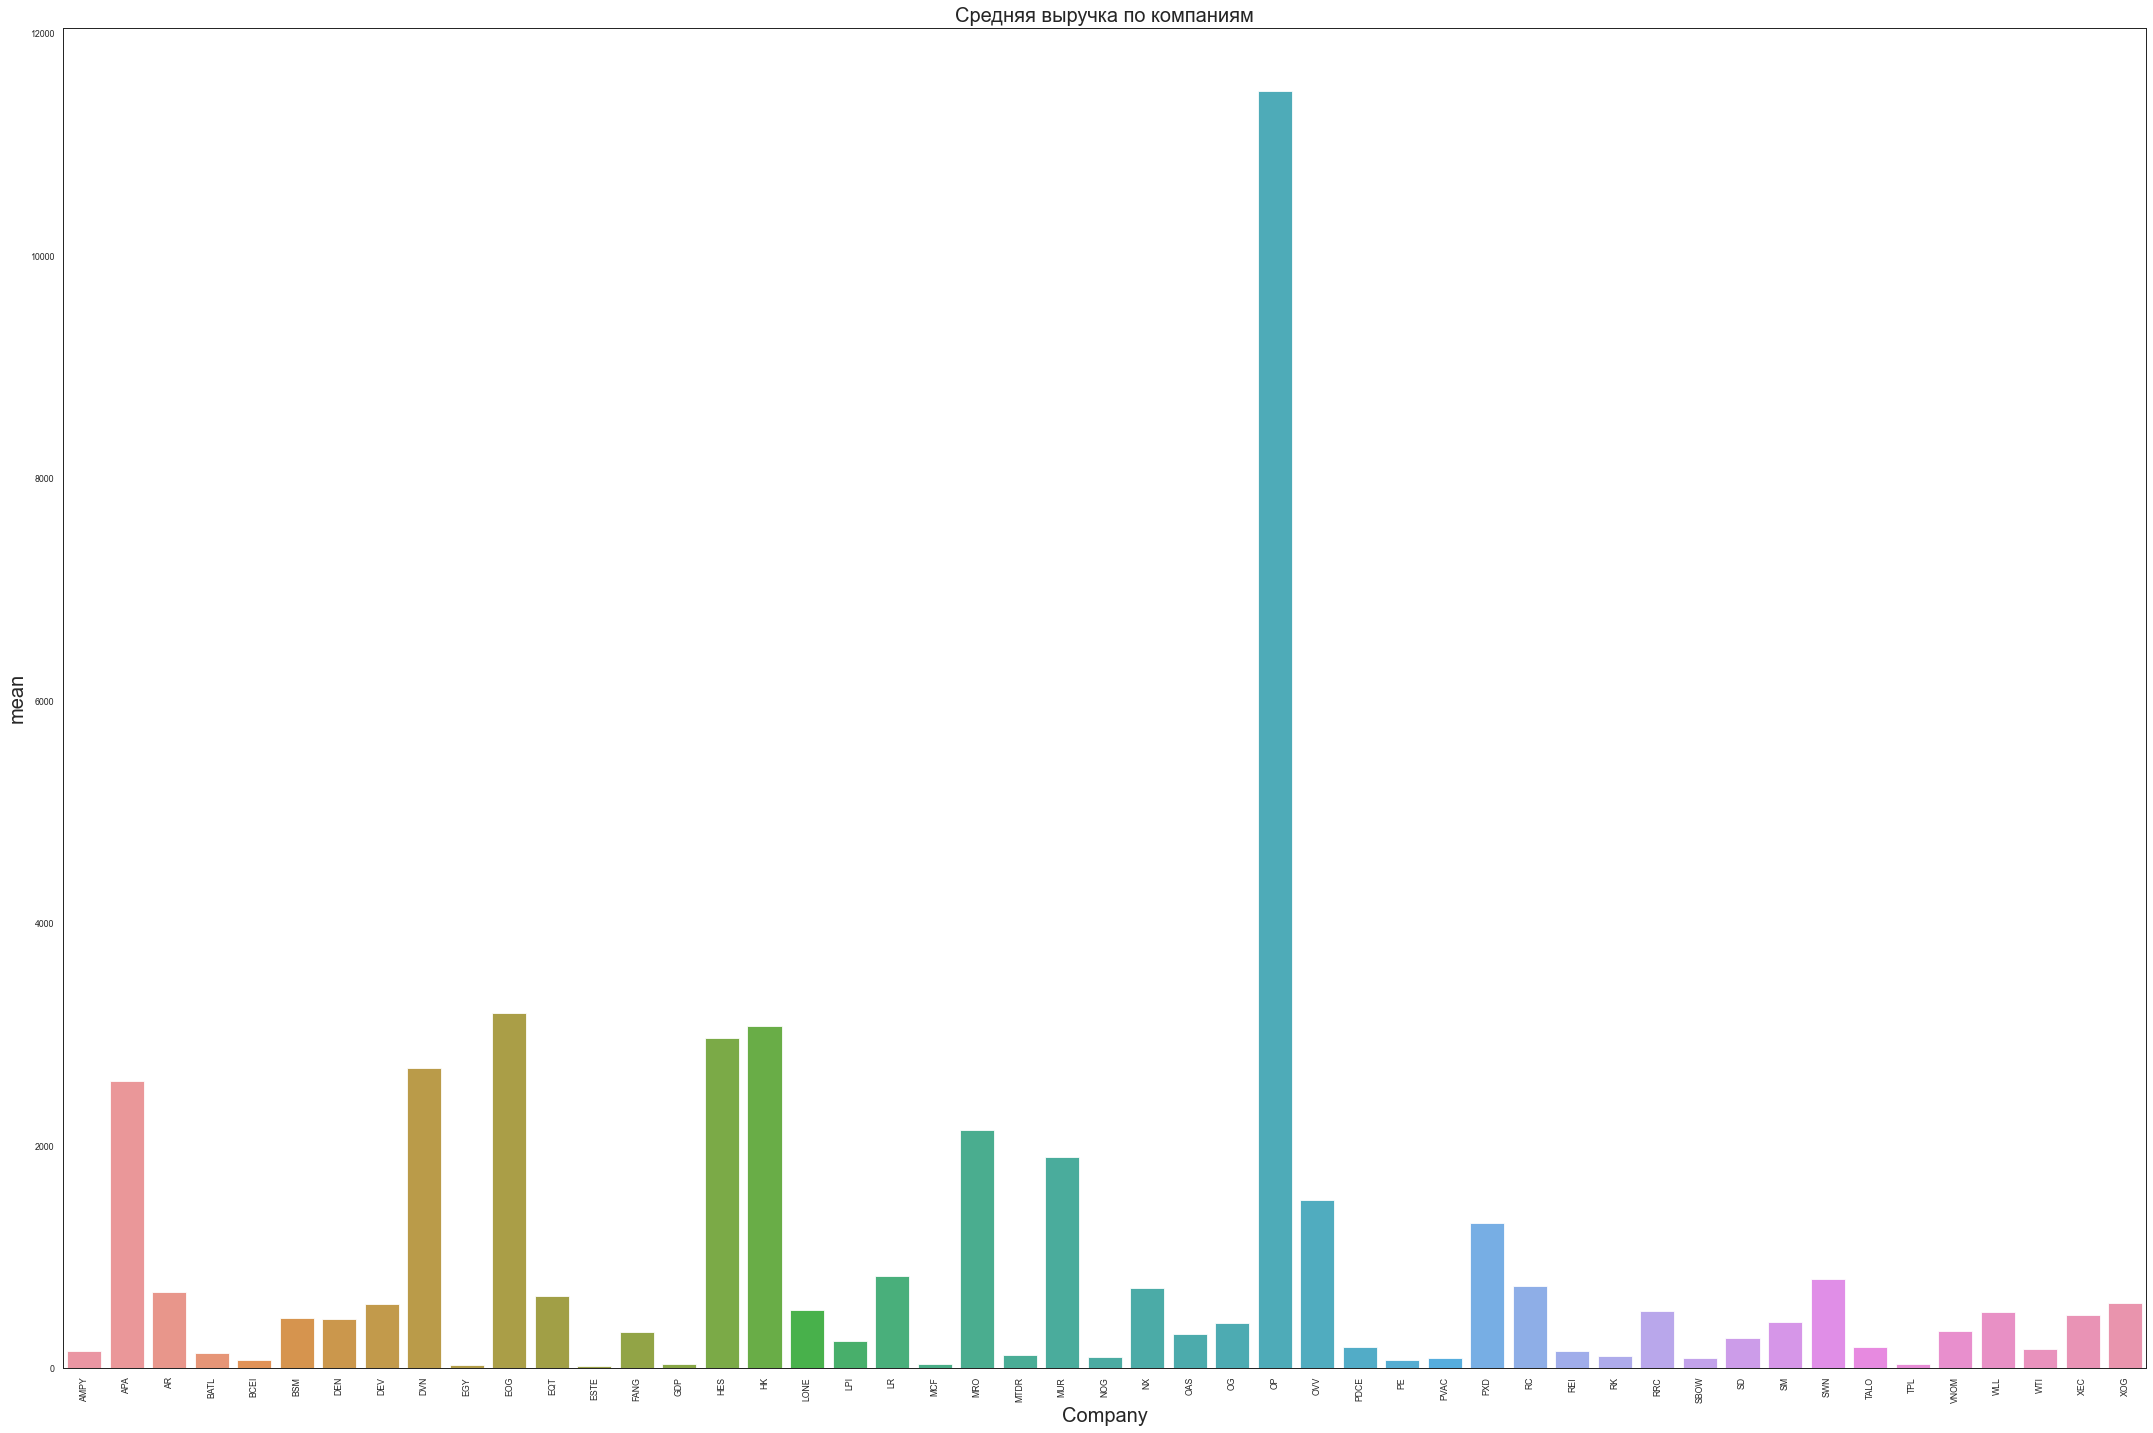

In [180]:
from matplotlib import rcParams
fig, ax = plt.subplots(figsize=(30, 20))
sns.set_context("paper", rc={"axes.titlesize":20,"axes.labelsize":20})   
sns.barplot(data=measure, x=measure.index,y='mean', ax=ax).set_title('Средняя выручка по компаниям')
plt.xticks(rotation=90)
plt.tight_layout()
#sns.barplot(data=measure, x=measure.index,y='mean')

Видем один очень яркий выброс -- OP с очень высокой выручка.

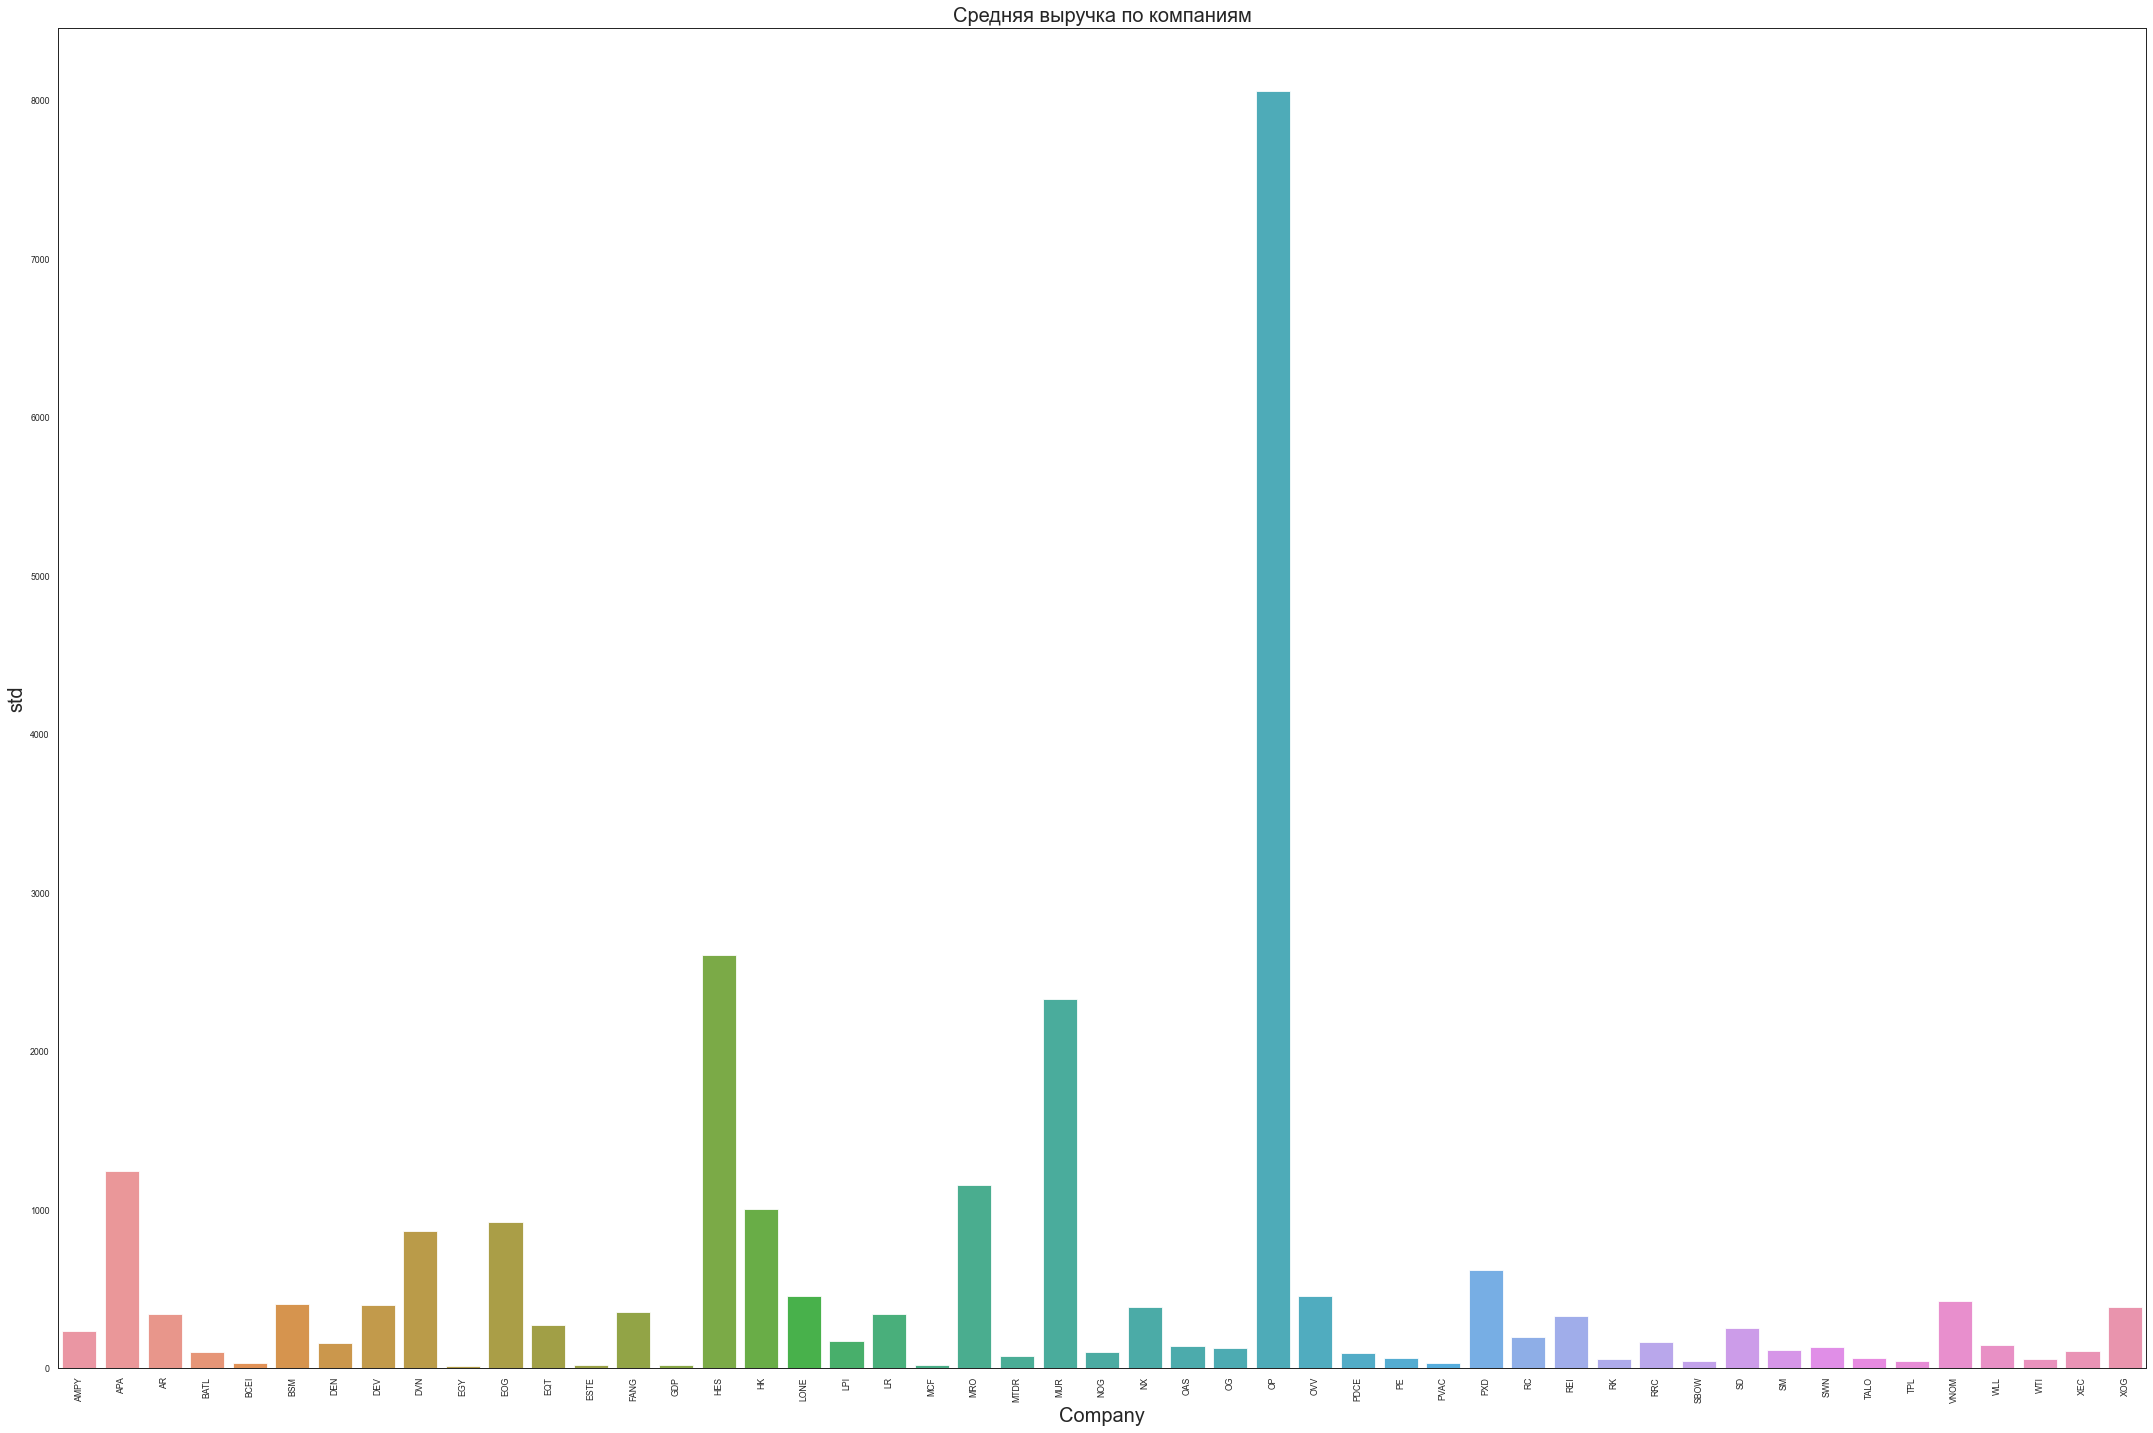

In [181]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.set_context("paper", rc={"axes.titlesize":20,"axes.labelsize":20})   
sns.barplot(data=measure, x=measure.index,y='std', ax=ax).set_title('Средняя выручка по компаниям')
plt.xticks(rotation=90)
plt.tight_layout()

Но при этом видим и что стандарстное отклонение у неё тоже очень большое

In [182]:
import plotly.express as px
fig = px.line(df_train, x=df_train.index, y="Revenue",color= 'Company')
fig.show()

У OP выручка гораздо выше остальных комнаний, поэтому если оставить его на графике, то графики всех остальных компаний как бы стелятся около 0. Если его выключить, то картина получается более показательной.Заметно, что для многих комнаний характерны сильные колебания выручки.

# Income

In [183]:
measure1 = df_train.groupby('Company')['Operating Income'].describe()
measure1

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
AMPY,37.0,28.129159,43.820330,-32.289000,4.692000,14.597000,36.704000,160.003958
APA,37.0,808.615121,784.663626,-340.000000,161.000000,447.000000,1468.999936,2227.000064
AR,37.0,113.270700,81.998595,-74.553000,71.852000,120.419000,145.463008,293.868992
BATL,37.0,30.989514,36.587686,-13.896000,1.152000,16.218000,50.900000,110.428000
BCEI,37.0,15.860635,19.950027,-45.610000,6.580000,17.760268,28.637000,55.931000
BSM,37.0,96.318686,61.736262,-2.879000,36.805000,79.557000,160.003958,170.716000
DEN,37.0,140.508402,91.922230,7.818000,76.274000,112.887000,213.262000,300.492000
DEV,37.0,104.404761,65.481039,-6.105000,45.769000,160.003958,160.003958,160.003958
DVN,37.0,415.810024,625.824904,-2540.000000,223.000000,479.000000,797.000000,1131.000064


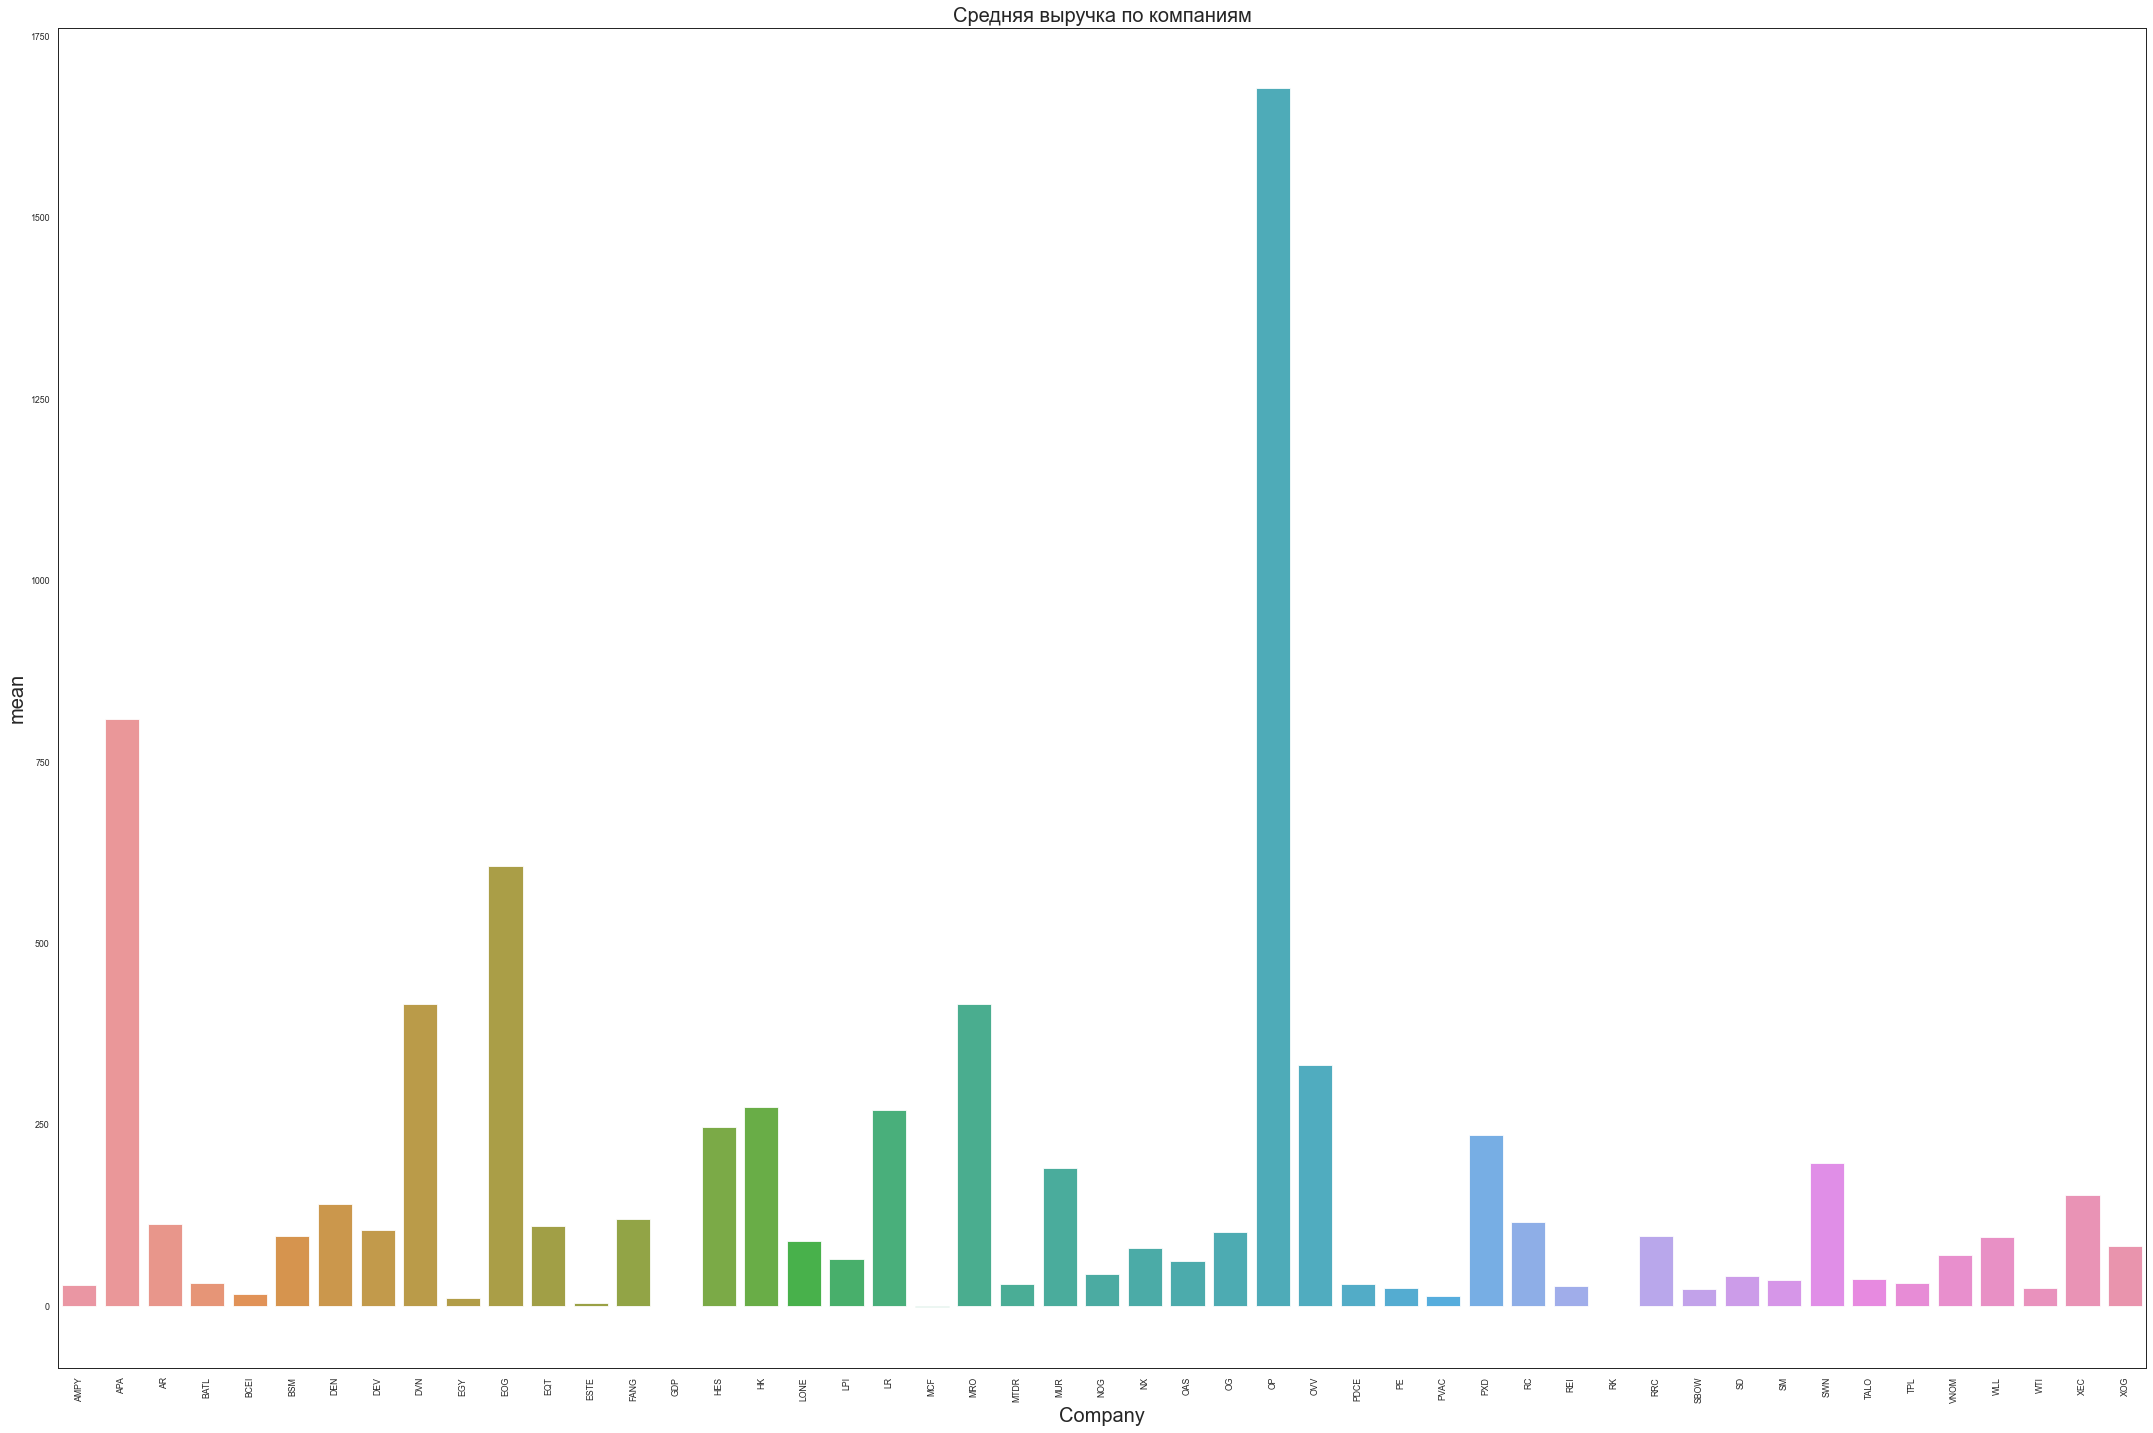

In [184]:
from matplotlib import rcParams
fig, ax = plt.subplots(figsize=(30, 20))
sns.set_context("paper", rc={"axes.titlesize":20,"axes.labelsize":20})   
sns.barplot(data=measure1, x=measure.index,y='mean', ax=ax).set_title('Средняя выручка по компаниям')
plt.xticks(rotation=90)
plt.tight_layout()

Аналогично, OP сильный выброс.

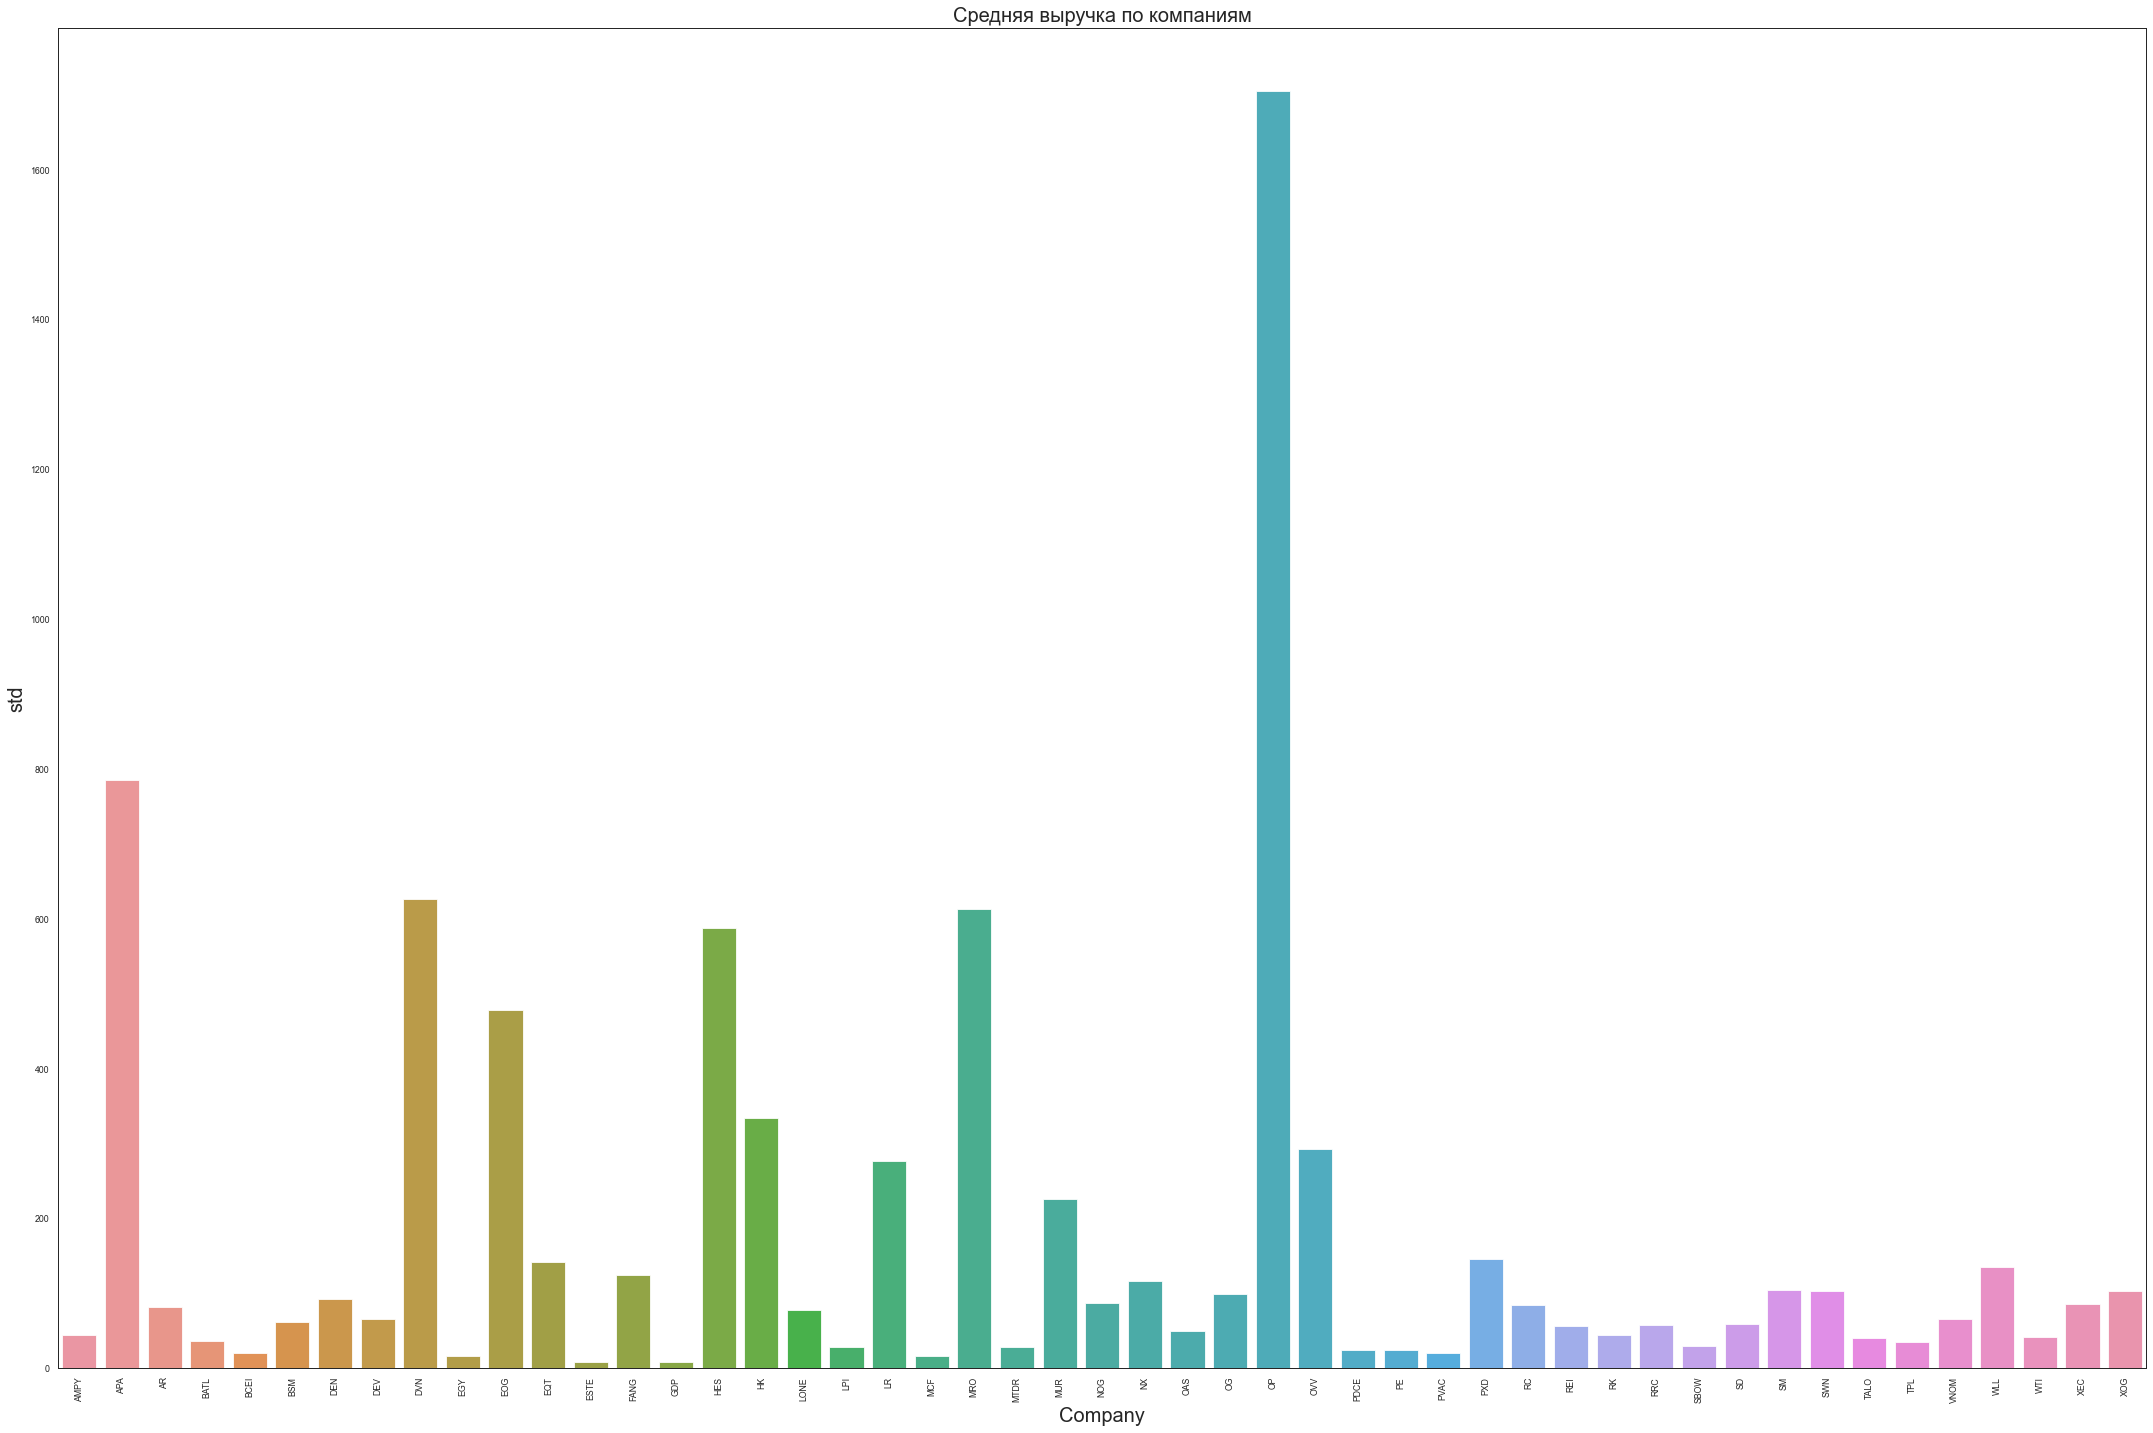

In [185]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.set_context("paper", rc={"axes.titlesize":20,"axes.labelsize":20})   
sns.barplot(data=measure1, x=measure.index,y='std', ax=ax).set_title('Средняя выручка по компаниям')
plt.xticks(rotation=90)
plt.tight_layout()

В целом, визуально кажется, что разброс больше у дохода, чем у выручки. Это говорит о том, что в большей степени волатильны расходы

In [186]:
fig = px.line(df_train, x=df_train.index, y="Operating Income",color= 'Company')
fig.show()

По этому графику мы видим, что некоторые компании уходят в минус в районе конца 2015-начала 2016. Быстрый гуглёж говорит, что в это время цены на рынки рекордно упали, отсюда и убытки (https://www.vedomosti.ru/business/articles/2016/02/08/627723-neftyanie-kompanii-mira).
(Нам бы для анализа не помешал график цен на нефть, наверное)

# Cash from Investing Activities

In [223]:
measure2 = df_train.groupby('Company')['Cash from Investing Activities'].describe()
measure2

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
AMPY,34.0,-85.499734,151.282917,-748.793984,-111.626000,-40.298500,-18.890750,66.925000
APA,37.0,-1285.270267,1512.025504,-4944.000000,-2449.999872,-951.000000,-509.000000,4391.000064
AR,34.0,-586.046262,382.371832,-1864.883968,-723.753024,-549.324992,-349.174744,124.699000
BATL,37.0,-206.535299,388.045274,-1220.150016,-319.692000,-128.466000,-49.114000,1317.787008
BCEI,37.0,-73.067434,69.890525,-354.736000,-108.421000,-53.439588,-34.540000,37.082000
BRY,10.0,-41.581600,19.167217,-68.759000,-56.218500,-41.533000,-26.619500,-10.833000
BSM,21.0,-46.563096,73.999506,-337.767008,-52.466000,-28.809000,-17.782000,13.224000
DEN,37.0,-191.298135,146.750055,-560.340992,-287.832000,-138.868992,-67.413000,-6.487000
DEV,17.0,-294.802528,393.182784,-1749.732992,-239.642000,-218.878000,-166.976000,-15.520000


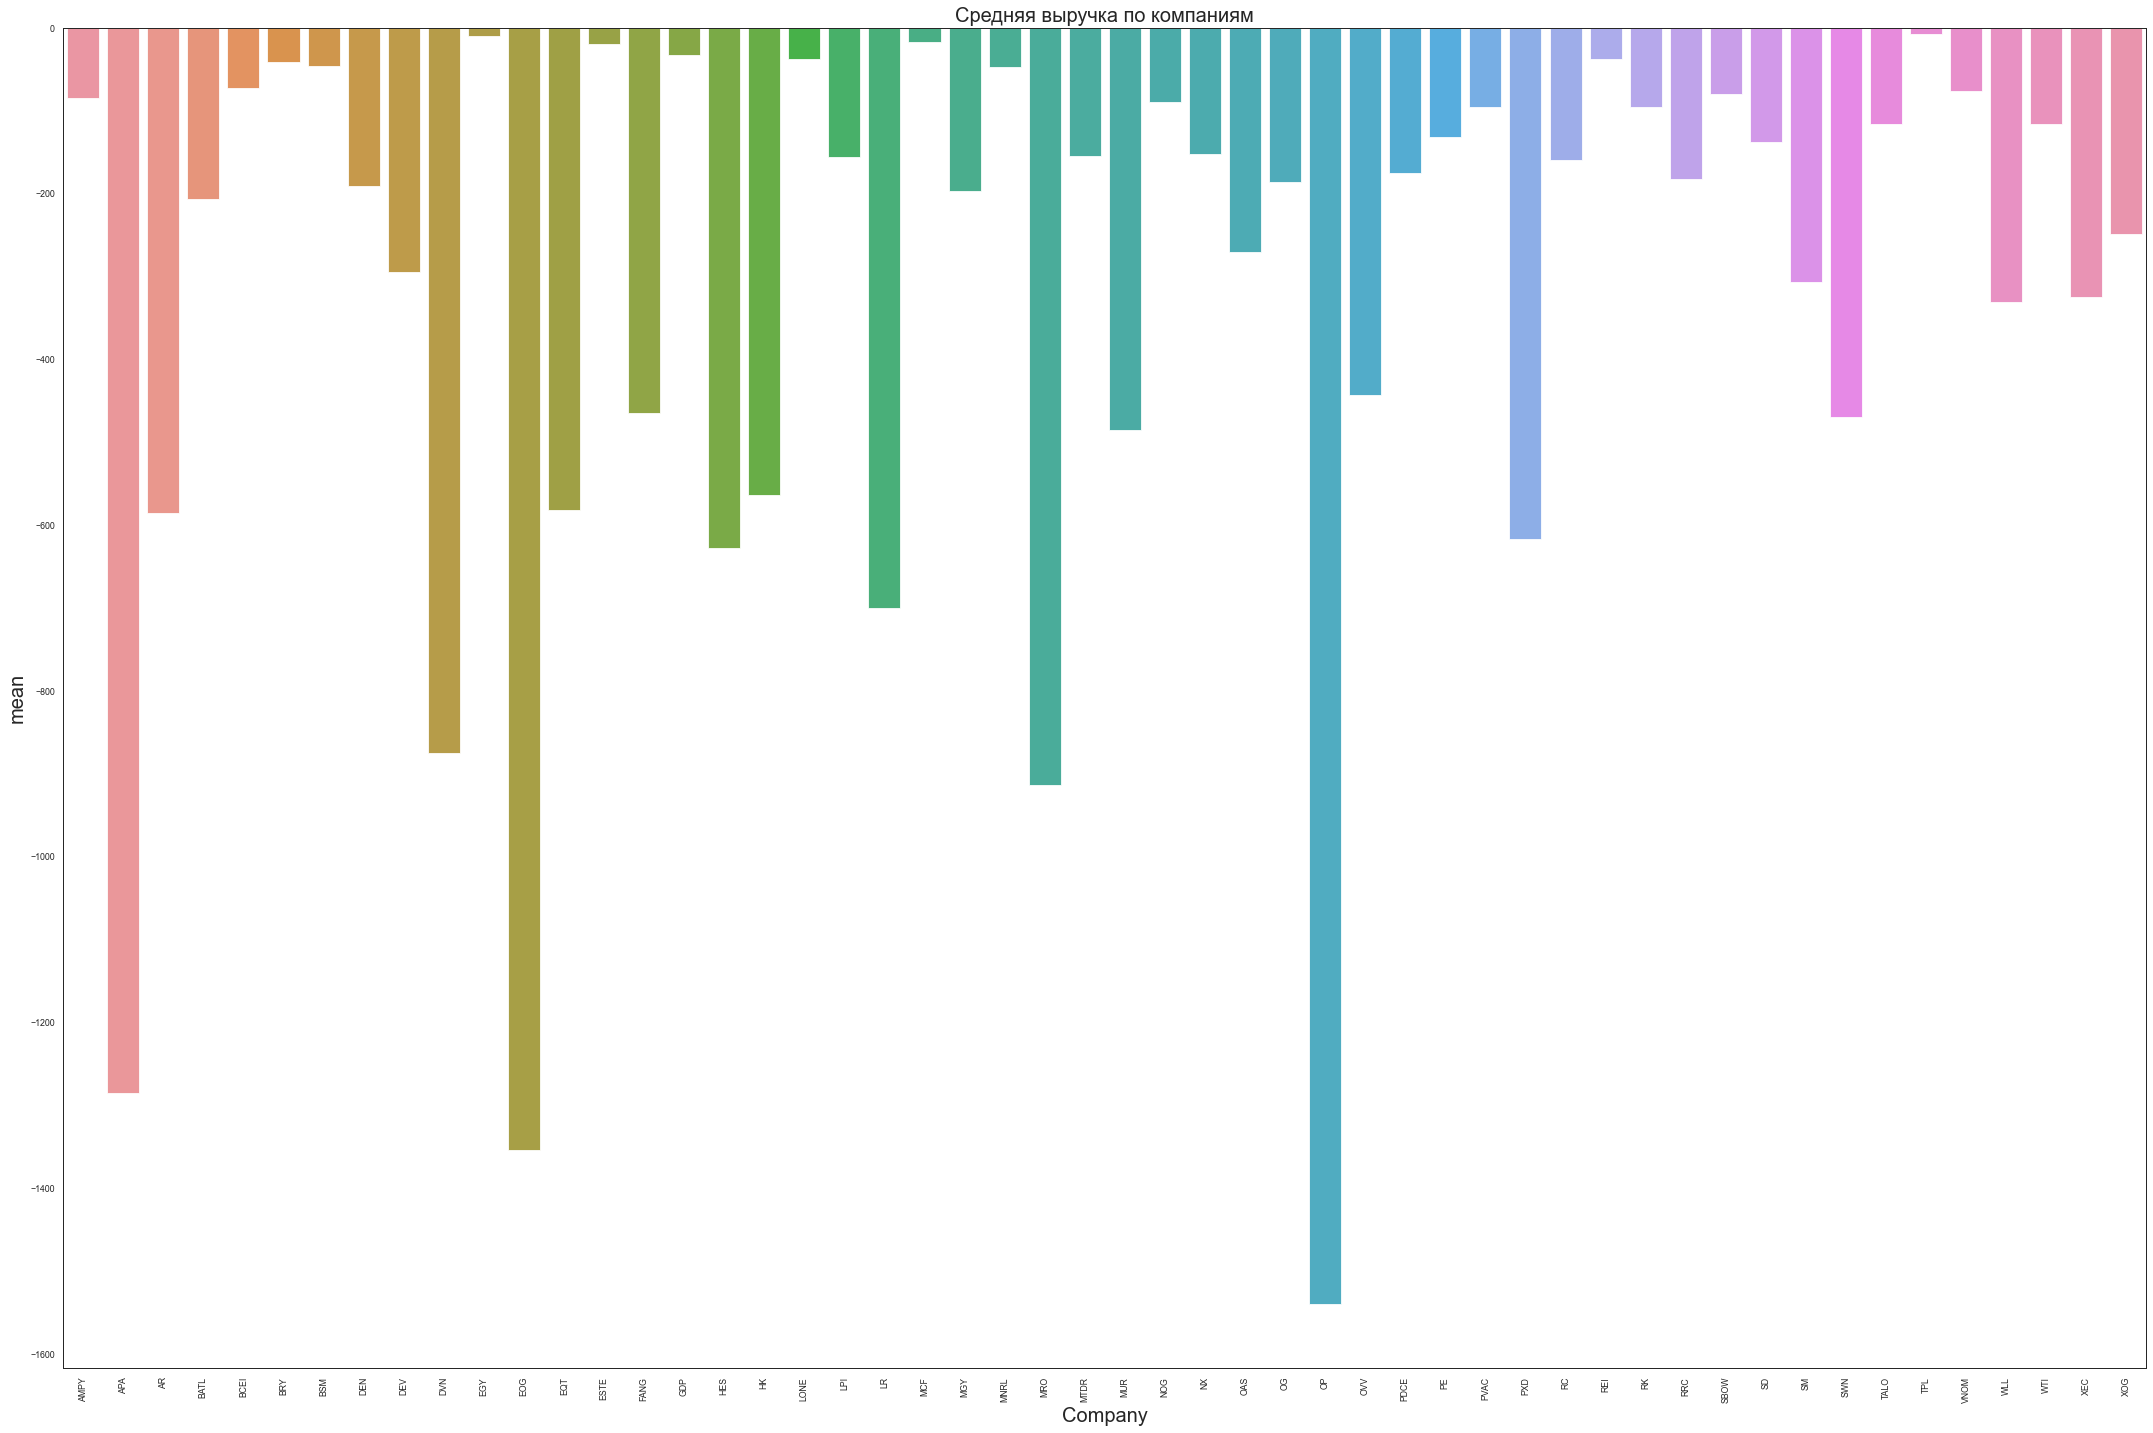

In [224]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.set_context("paper", rc={"axes.titlesize":20,"axes.labelsize":20})   
sns.barplot(data=measure2, x=measure2.index,y='mean', ax=ax).set_title('Средняя выручка по компаниям')
plt.xticks(rotation=90)
plt.tight_layout()

В среднем по инвестиционным активностям компании уходят в минус: инвестиции не приносят прибыли

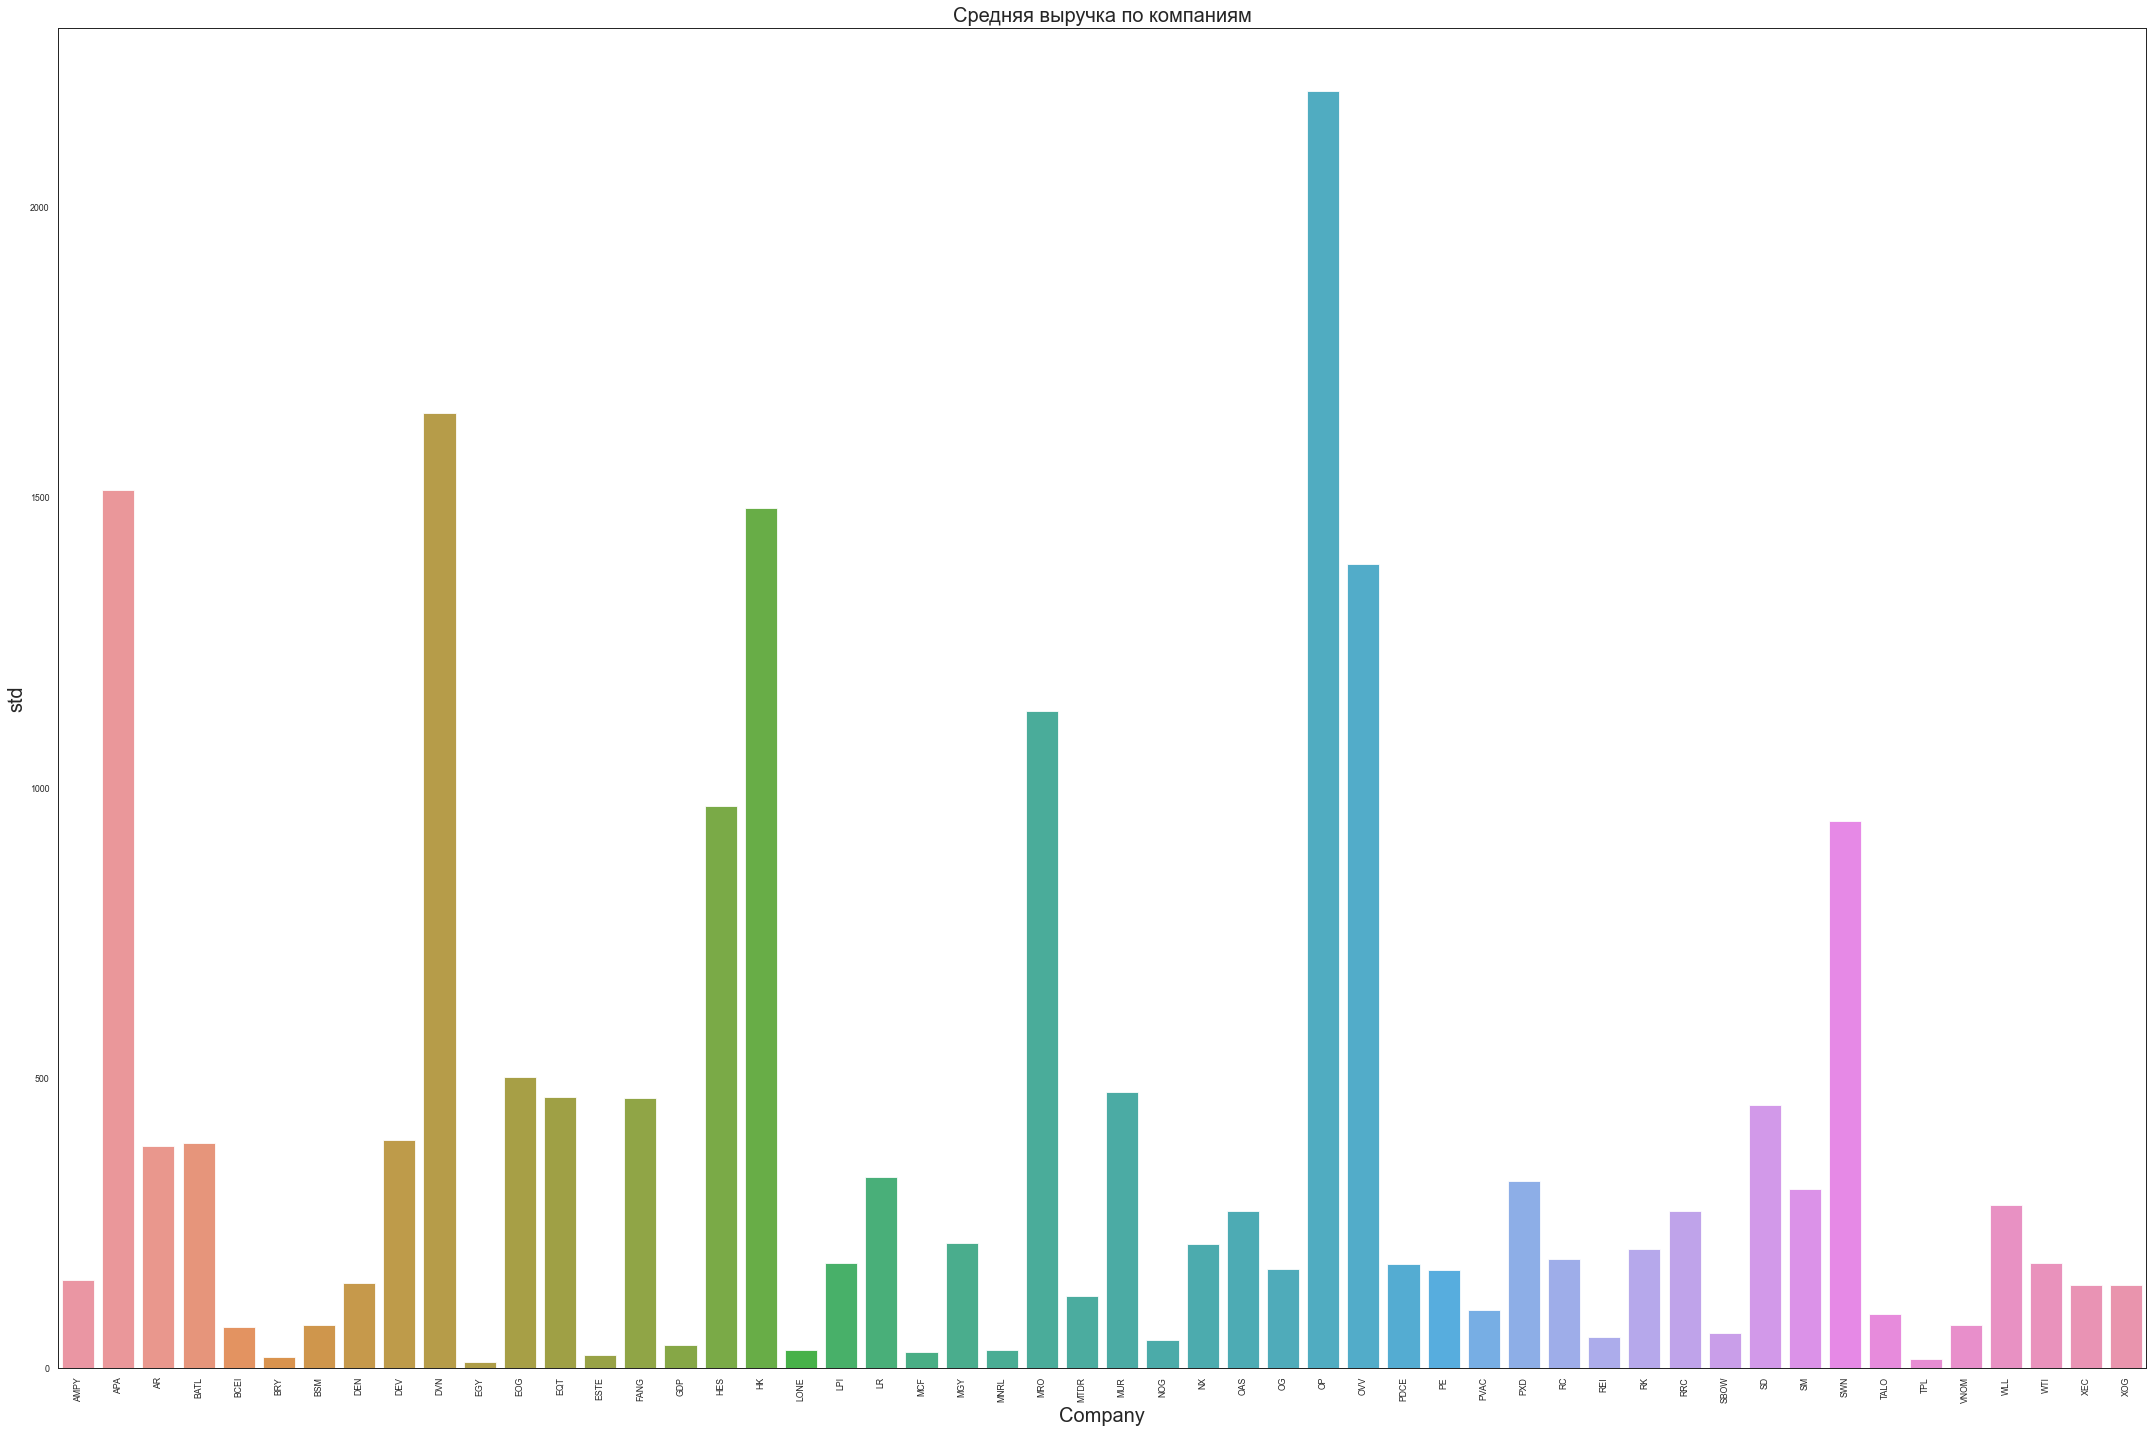

In [225]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.set_context("paper", rc={"axes.titlesize":20,"axes.labelsize":20})   
sns.barplot(data=measure2, x=measure2.index,y='std', ax=ax).set_title('Средняя выручка по компаниям')
plt.xticks(rotation=90)
plt.tight_layout()

In [226]:
fig = px.line(df_train, x=df_train.index, y="Cash from Investing Activities",color= 'Company')
fig.show()

Видно, что волатильность очень большая, но при этом кэш от инвестиционной активности всё равно колеблется примерно около 0

# EPS

In [191]:
measure3 = df_train.groupby('Company')['EPS'].describe()
measure3

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
AMPY,37.0,-0.521139,1.856511e+00,-8.901539,-0.266347,-0.034098,0.277355,0.590786
APA,37.0,0.962052,1.159010e+00,-0.830688,0.036745,0.473822,1.841432,3.319922
AR,37.0,0.106084,3.310961e-01,-1.081500,-0.028894,0.127777,0.335217,1.130000
BATL,37.0,-0.055594,4.898204e-01,-1.663779,-0.110686,-0.031778,0.063515,1.668500
BCEI,37.0,0.232999,9.652357e-01,-3.866571,0.016153,0.290277,0.743198,1.678921
BSM,37.0,0.245363,1.218277e-01,-0.129819,0.183129,0.307505,0.335217,0.386891
DEN,37.0,0.180831,1.473682e-01,-0.062684,0.066837,0.137469,0.282455,0.437905
DEV,37.0,0.236395,1.407637e-01,-0.164811,0.144878,0.335217,0.335217,0.335217
DVN,37.0,0.494664,7.876955e-01,-1.893154,0.116885,0.359547,1.100862,1.599171


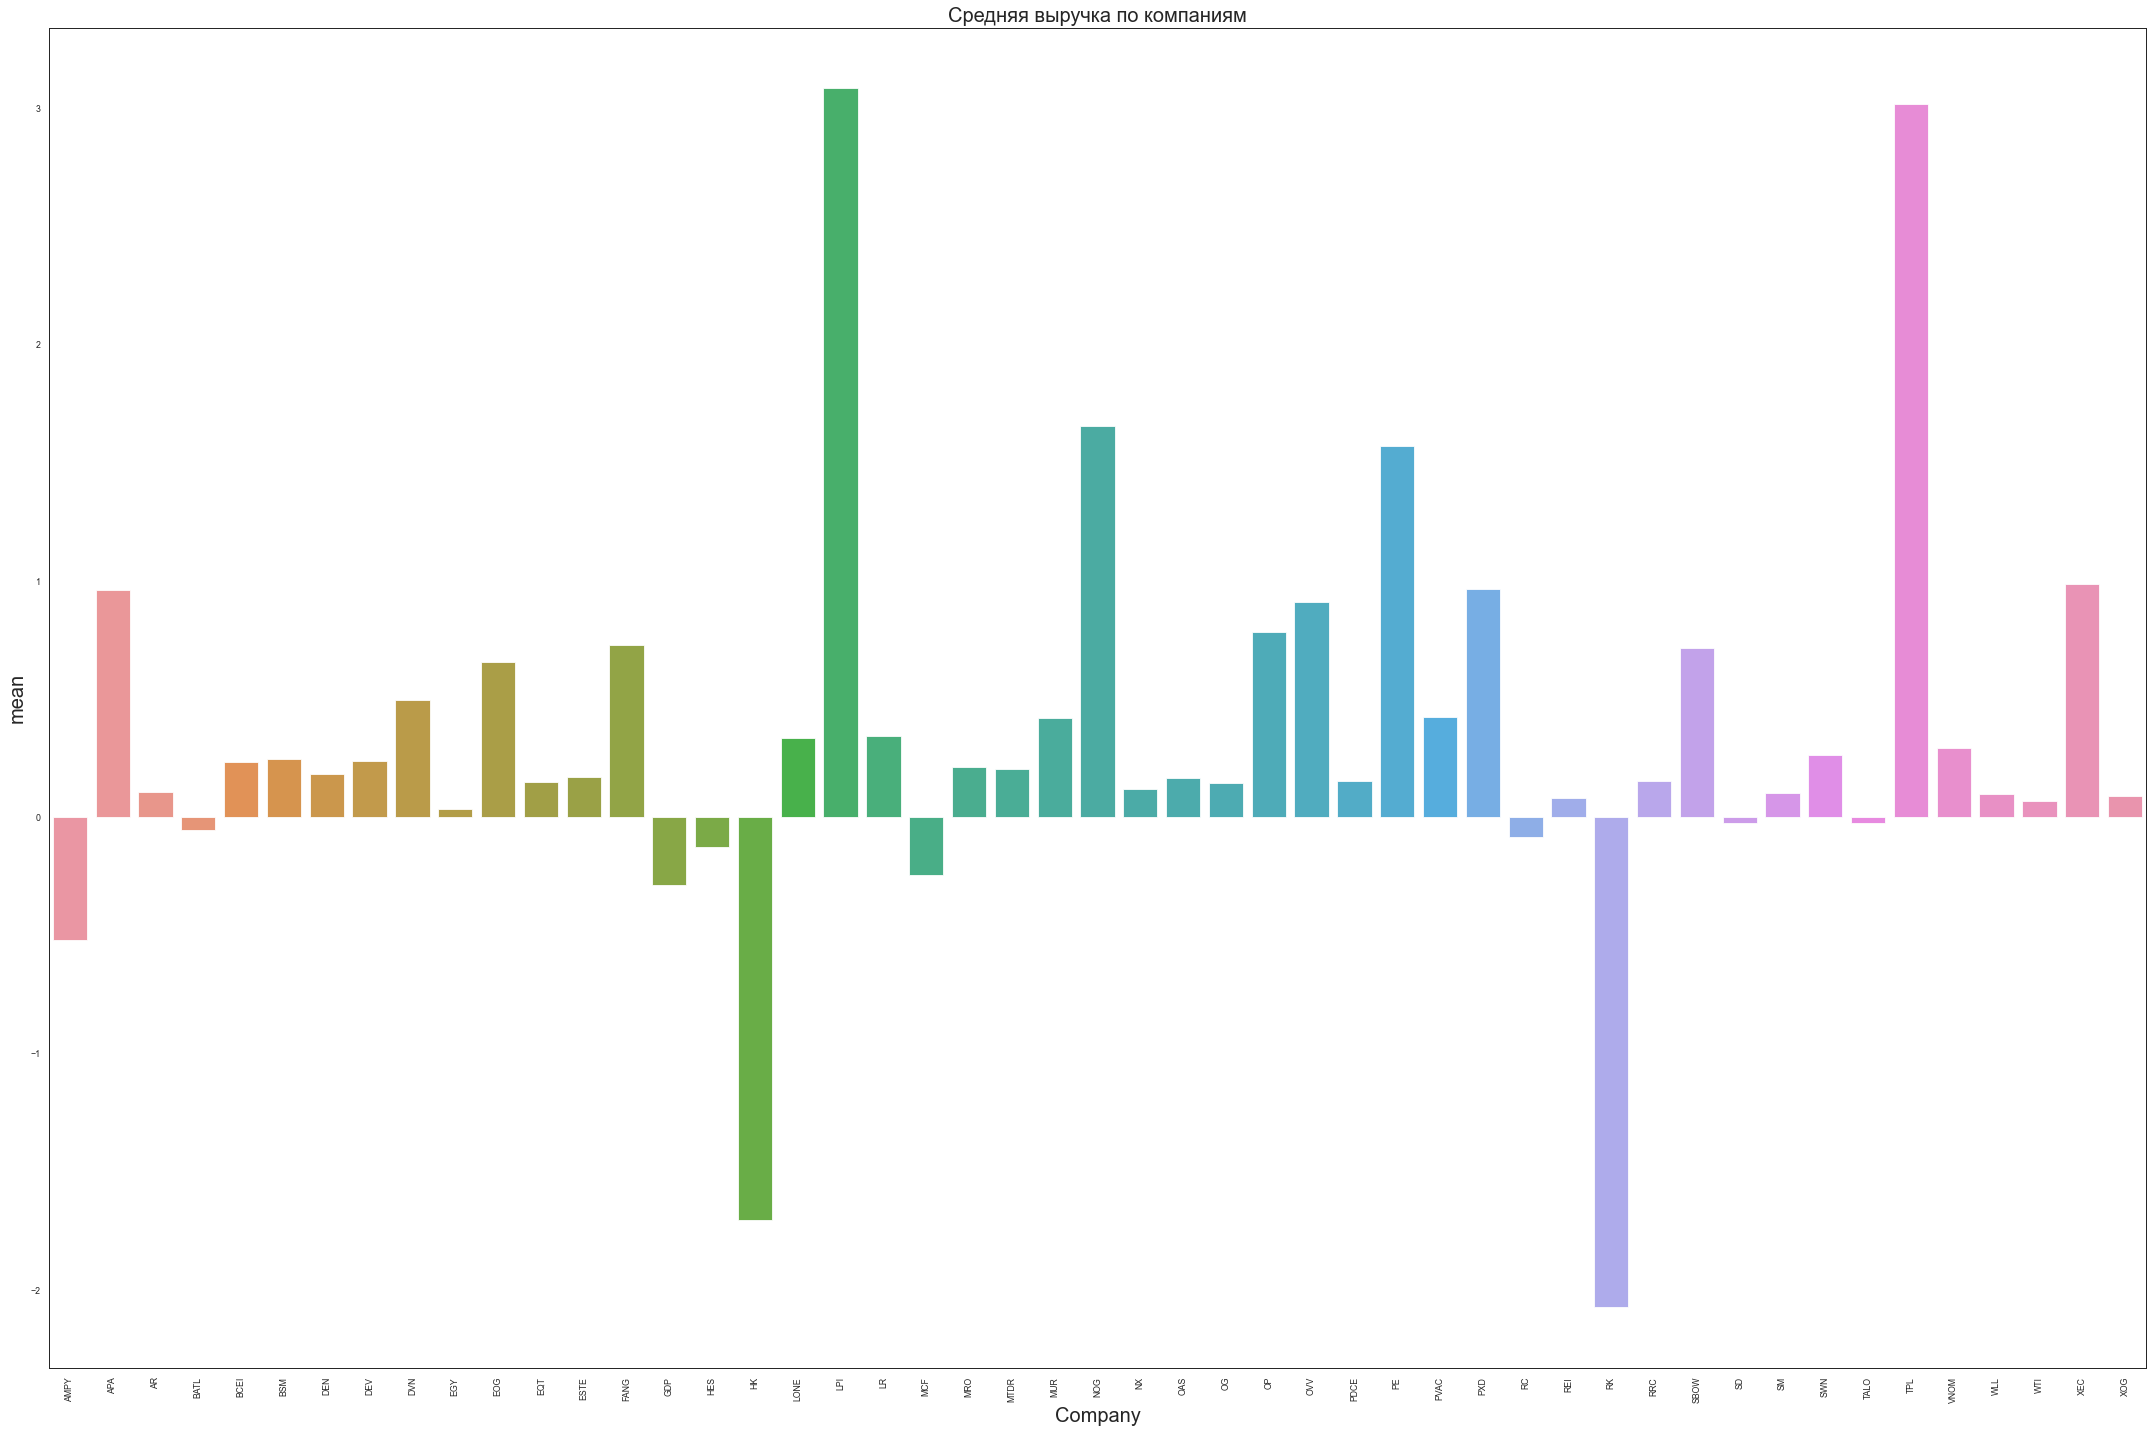

In [192]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.set_context("paper", rc={"axes.titlesize":20,"axes.labelsize":20})   
sns.barplot(data=measure3, x=measure3.index,y='mean', ax=ax).set_title('Средняя выручка по компаниям')
plt.xticks(rotation=90)
plt.tight_layout()

Некоторые компании уходят в минус по ERS за счёт отрицательного Net Income, т.е. на акцию акционер получит отрицательную прибыль.

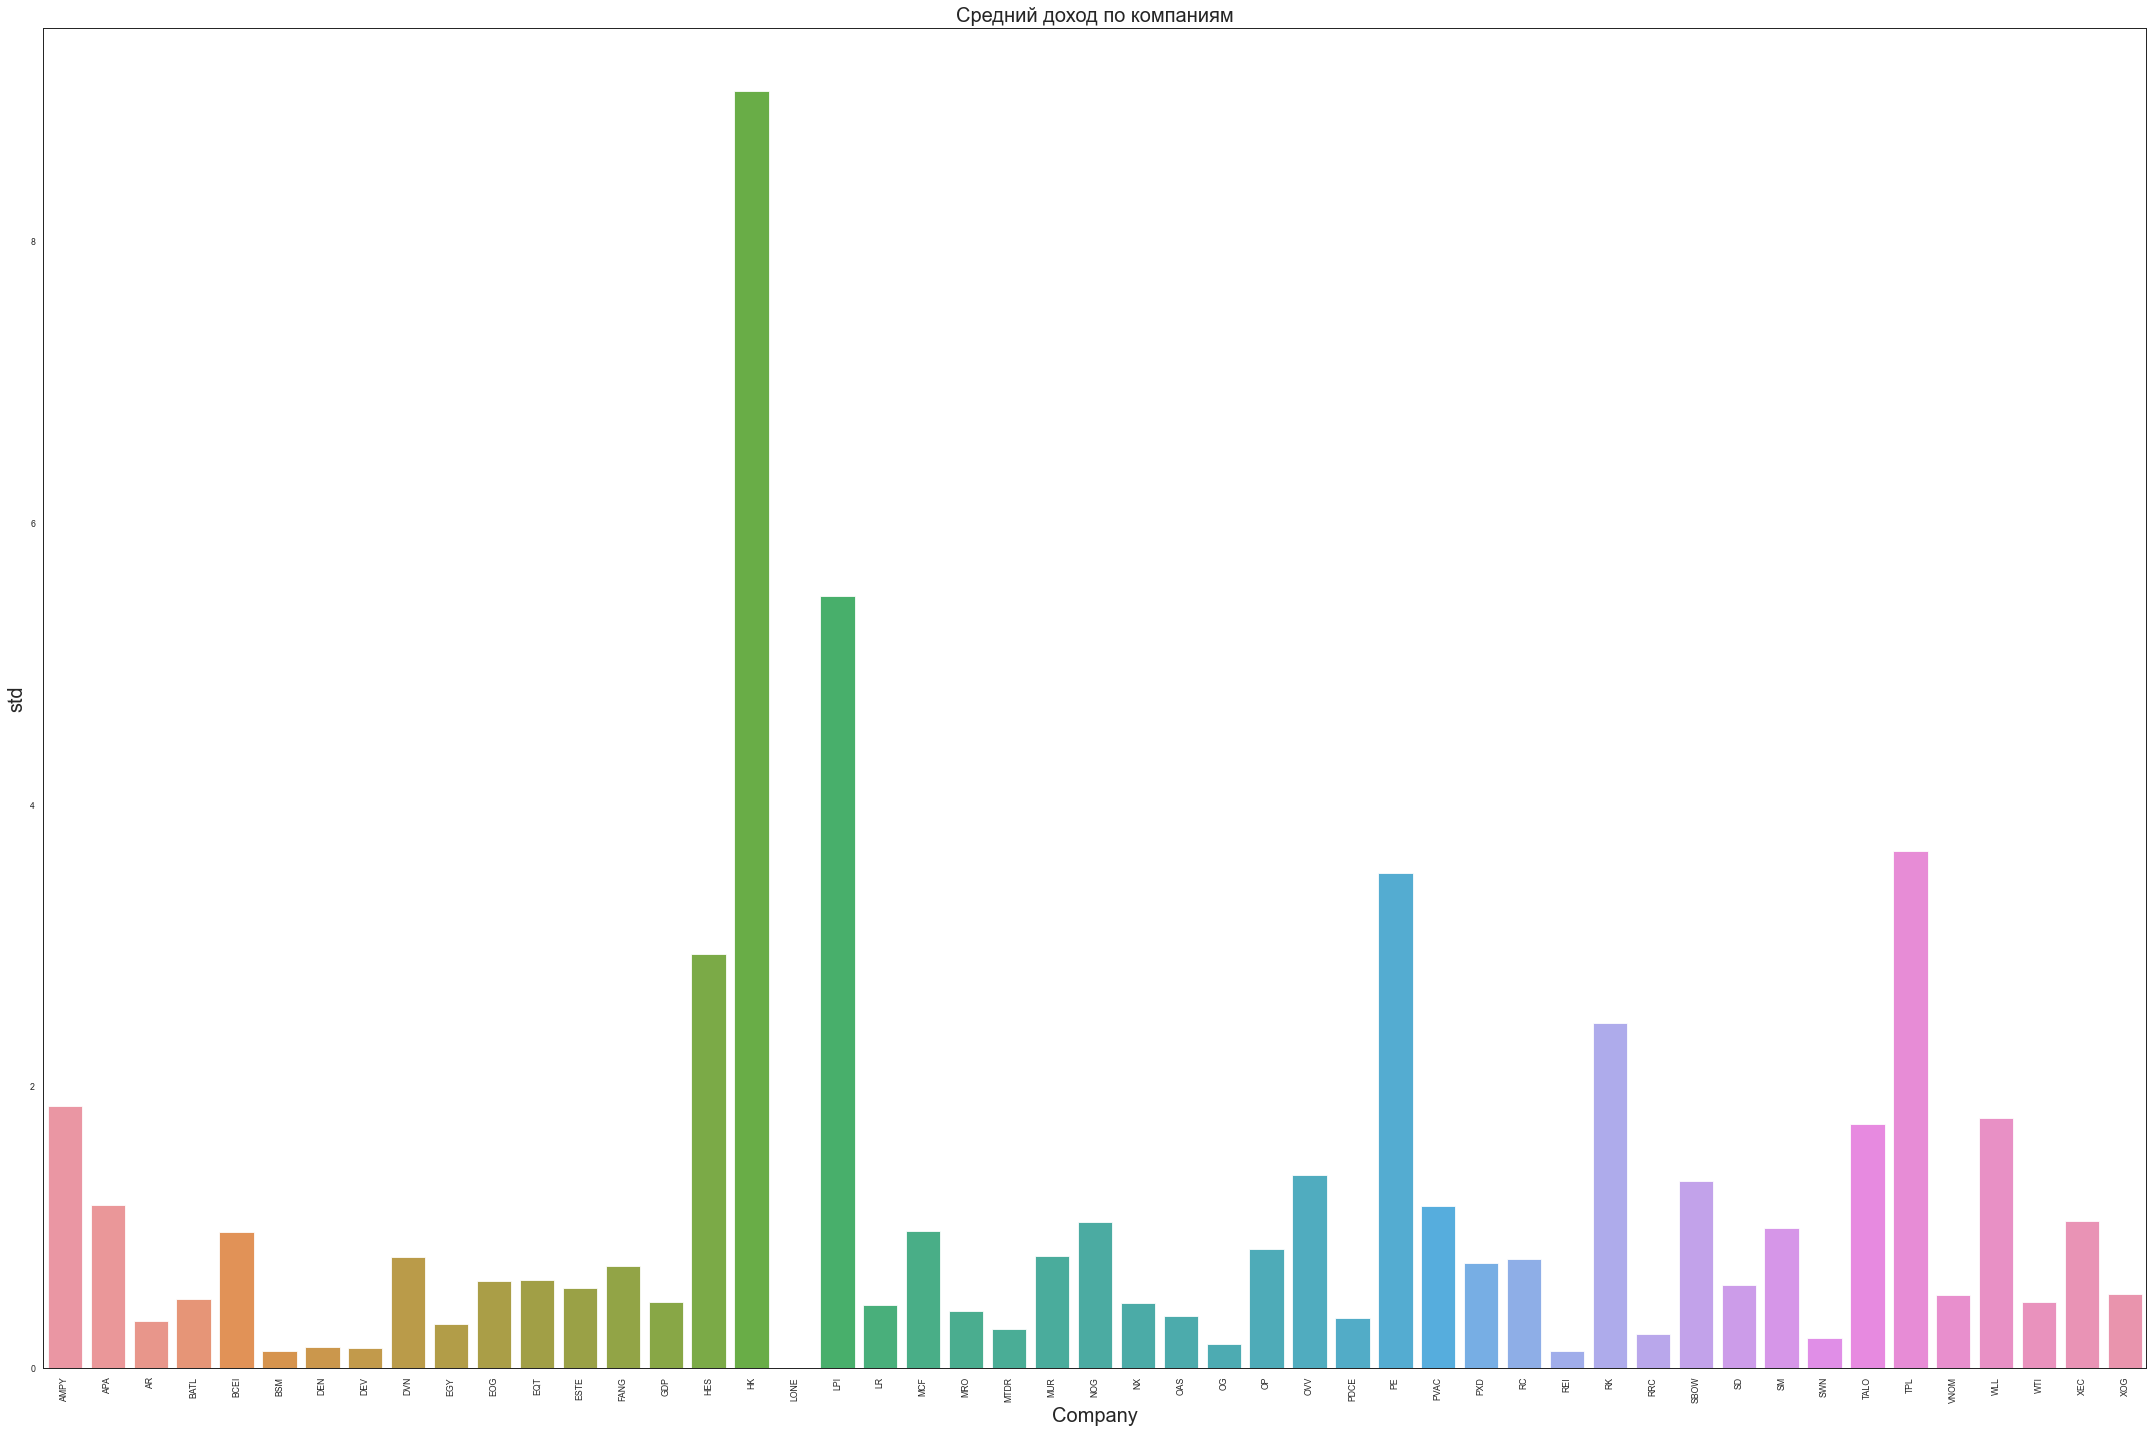

In [193]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.set_context("paper", rc={"axes.titlesize":20,"axes.labelsize":20})   
sns.barplot(data=measure3, x=measure3.index,y='std', ax=ax).set_title('Средний доход по компаниям')
plt.xticks(rotation=90)
plt.tight_layout()

In [194]:
fig = px.line(df_train, x=df_train.index, y="EPS",color= 'Company')
fig.show()

Видно, что в основном колебания EPS у некоторы компаний появились в начале 2020 года и наверняка связаны с пандемией. В остальном этот показатель достаточно стабильный.

# Total Assets

Далее выводы будут в целом аналогичны:

In [195]:
measure4 = df_train.groupby('Company')['Total Assets'].describe()
measure4

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
AMPY,37.0,1997.578879,2736.898440,507.124992,688.609024,836.843008,2271.599104,10777.173575
APA,37.0,37785.729633,17981.809631,13390.999552,21834.999808,27811.999744,57216.999424,63350.001664
AR,37.0,11304.564396,4760.757333,2483.419904,7134.456832,13558.779904,15197.569024,17330.880512
BATL,37.0,2826.768375,2053.667490,267.174000,1166.630016,2081.350016,5041.025024,6434.475008
BCEI,37.0,1190.395631,437.489186,528.392320,872.406976,1135.165056,1299.771776,2114.749952
BSM,37.0,4942.926569,4618.773829,1045.843008,1250.086016,1669.464064,10777.173575,10777.173575
DEN,37.0,7901.037928,3284.877683,4274.577920,4691.162112,7355.151872,11139.342336,12727.801856
DEV,37.0,7022.417251,4062.416964,0.476191,3692.562944,10777.173575,10777.173575,10777.173575
DVN,37.0,33561.107926,11425.888063,11143.999488,26813.999104,34350.999552,42604.998656,52764.999680


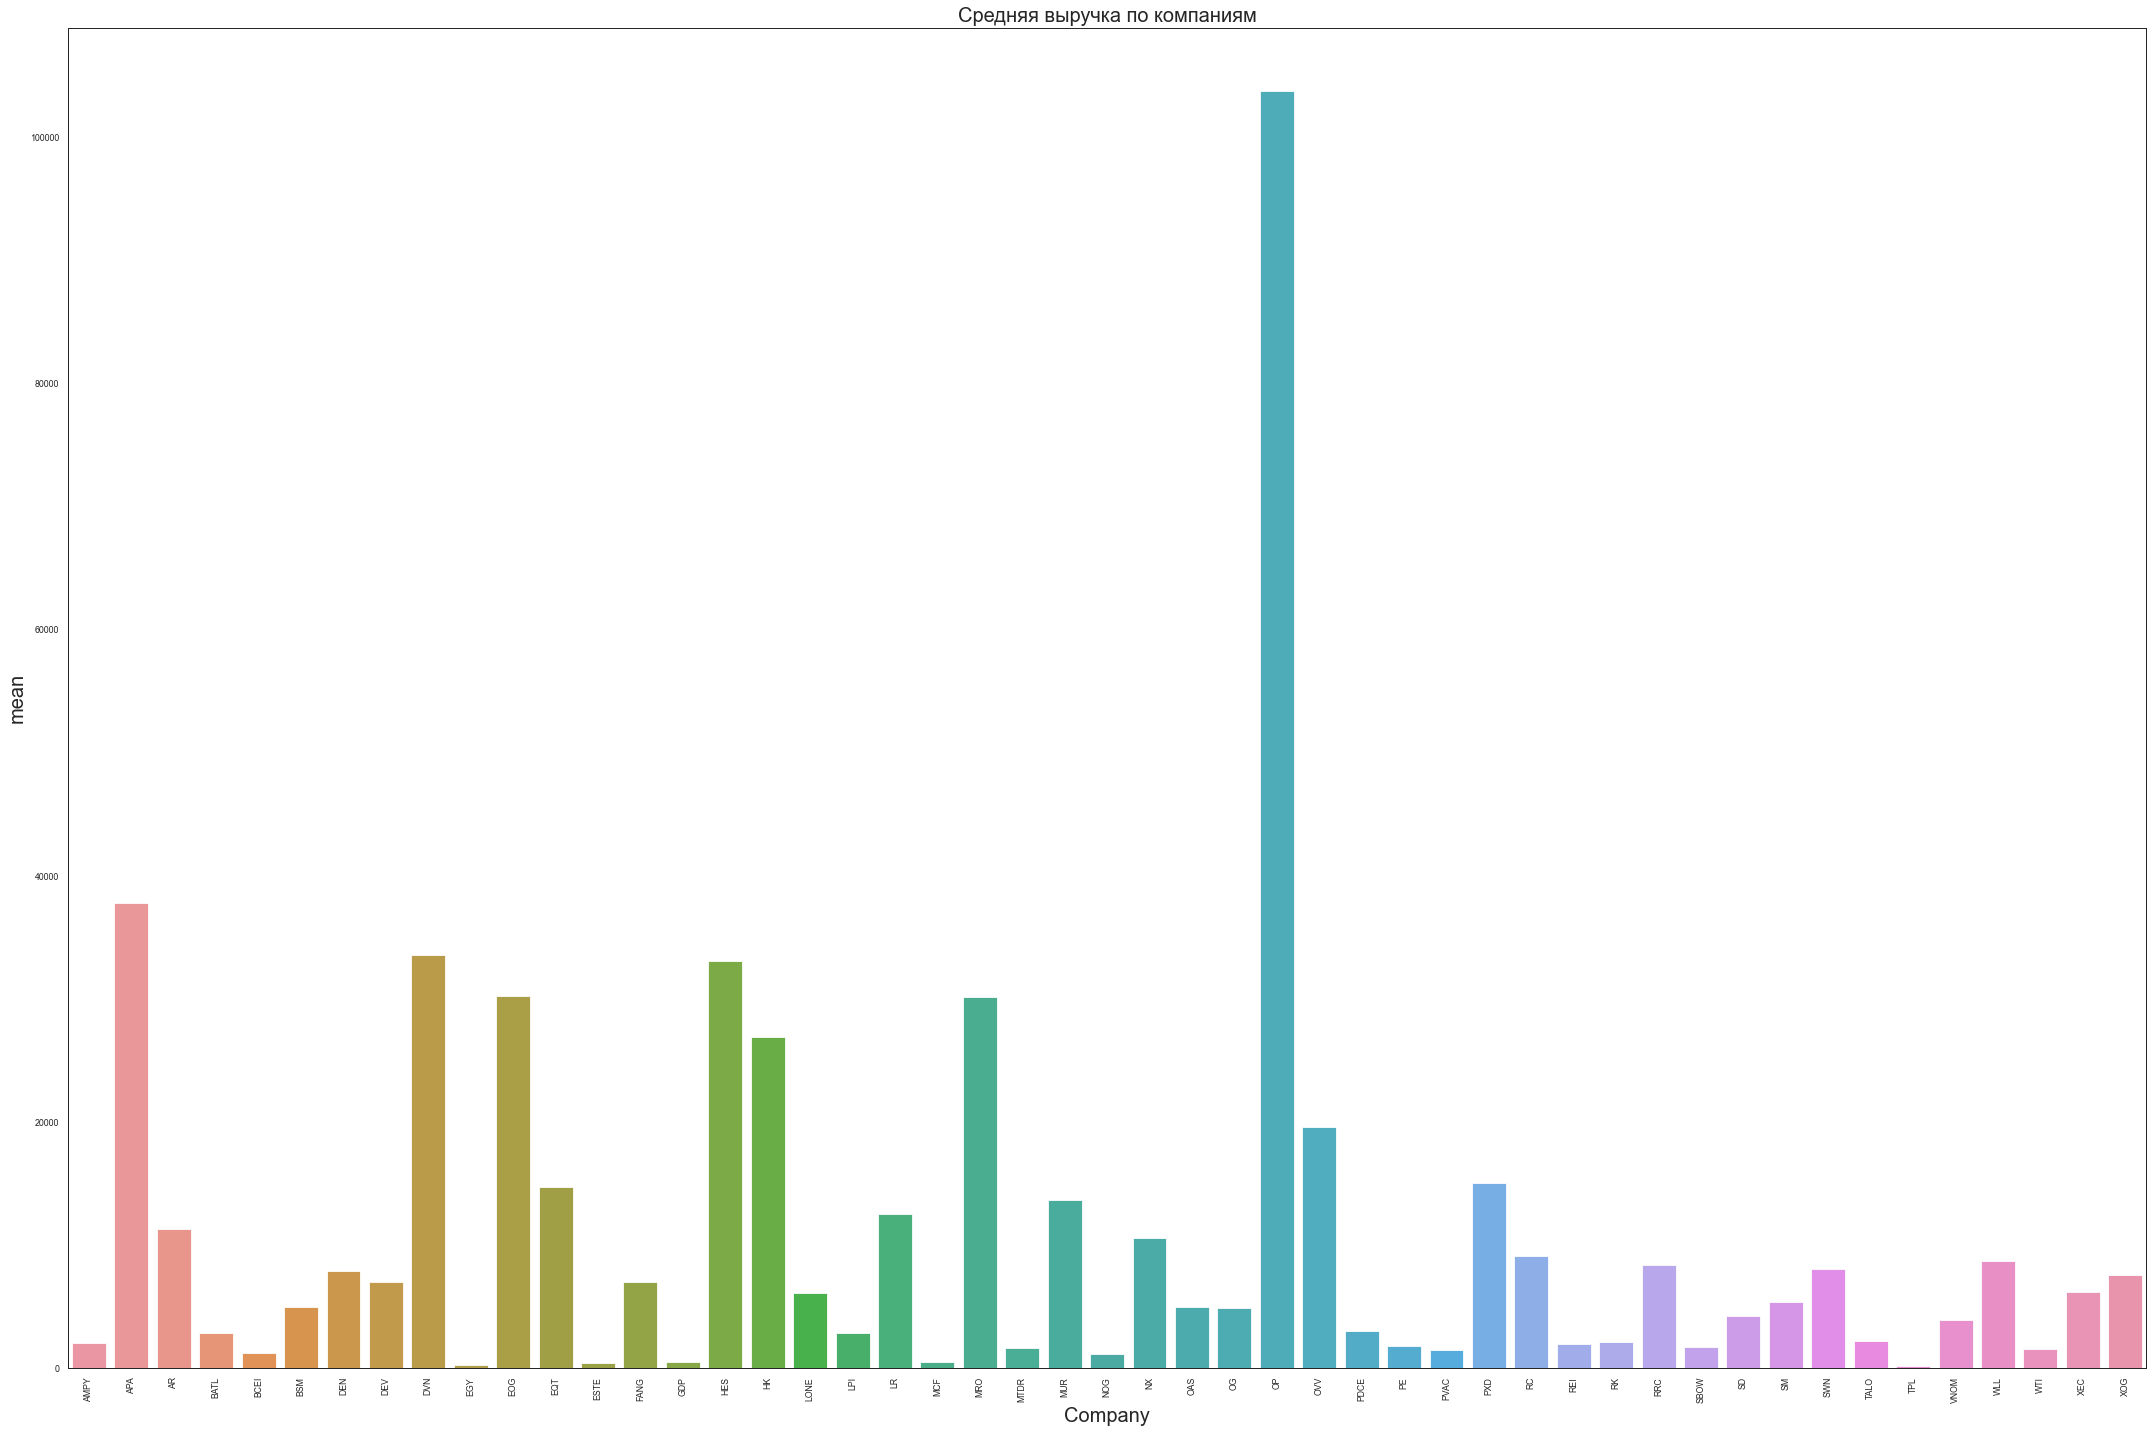

In [196]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.set_context("paper", rc={"axes.titlesize":20,"axes.labelsize":20})   
sns.barplot(data=measure4, x=measure4.index,y='mean', ax=ax).set_title('Средняя выручка по компаниям')
plt.xticks(rotation=90)
plt.tight_layout()

Опять OP лидирует по размеру признака.

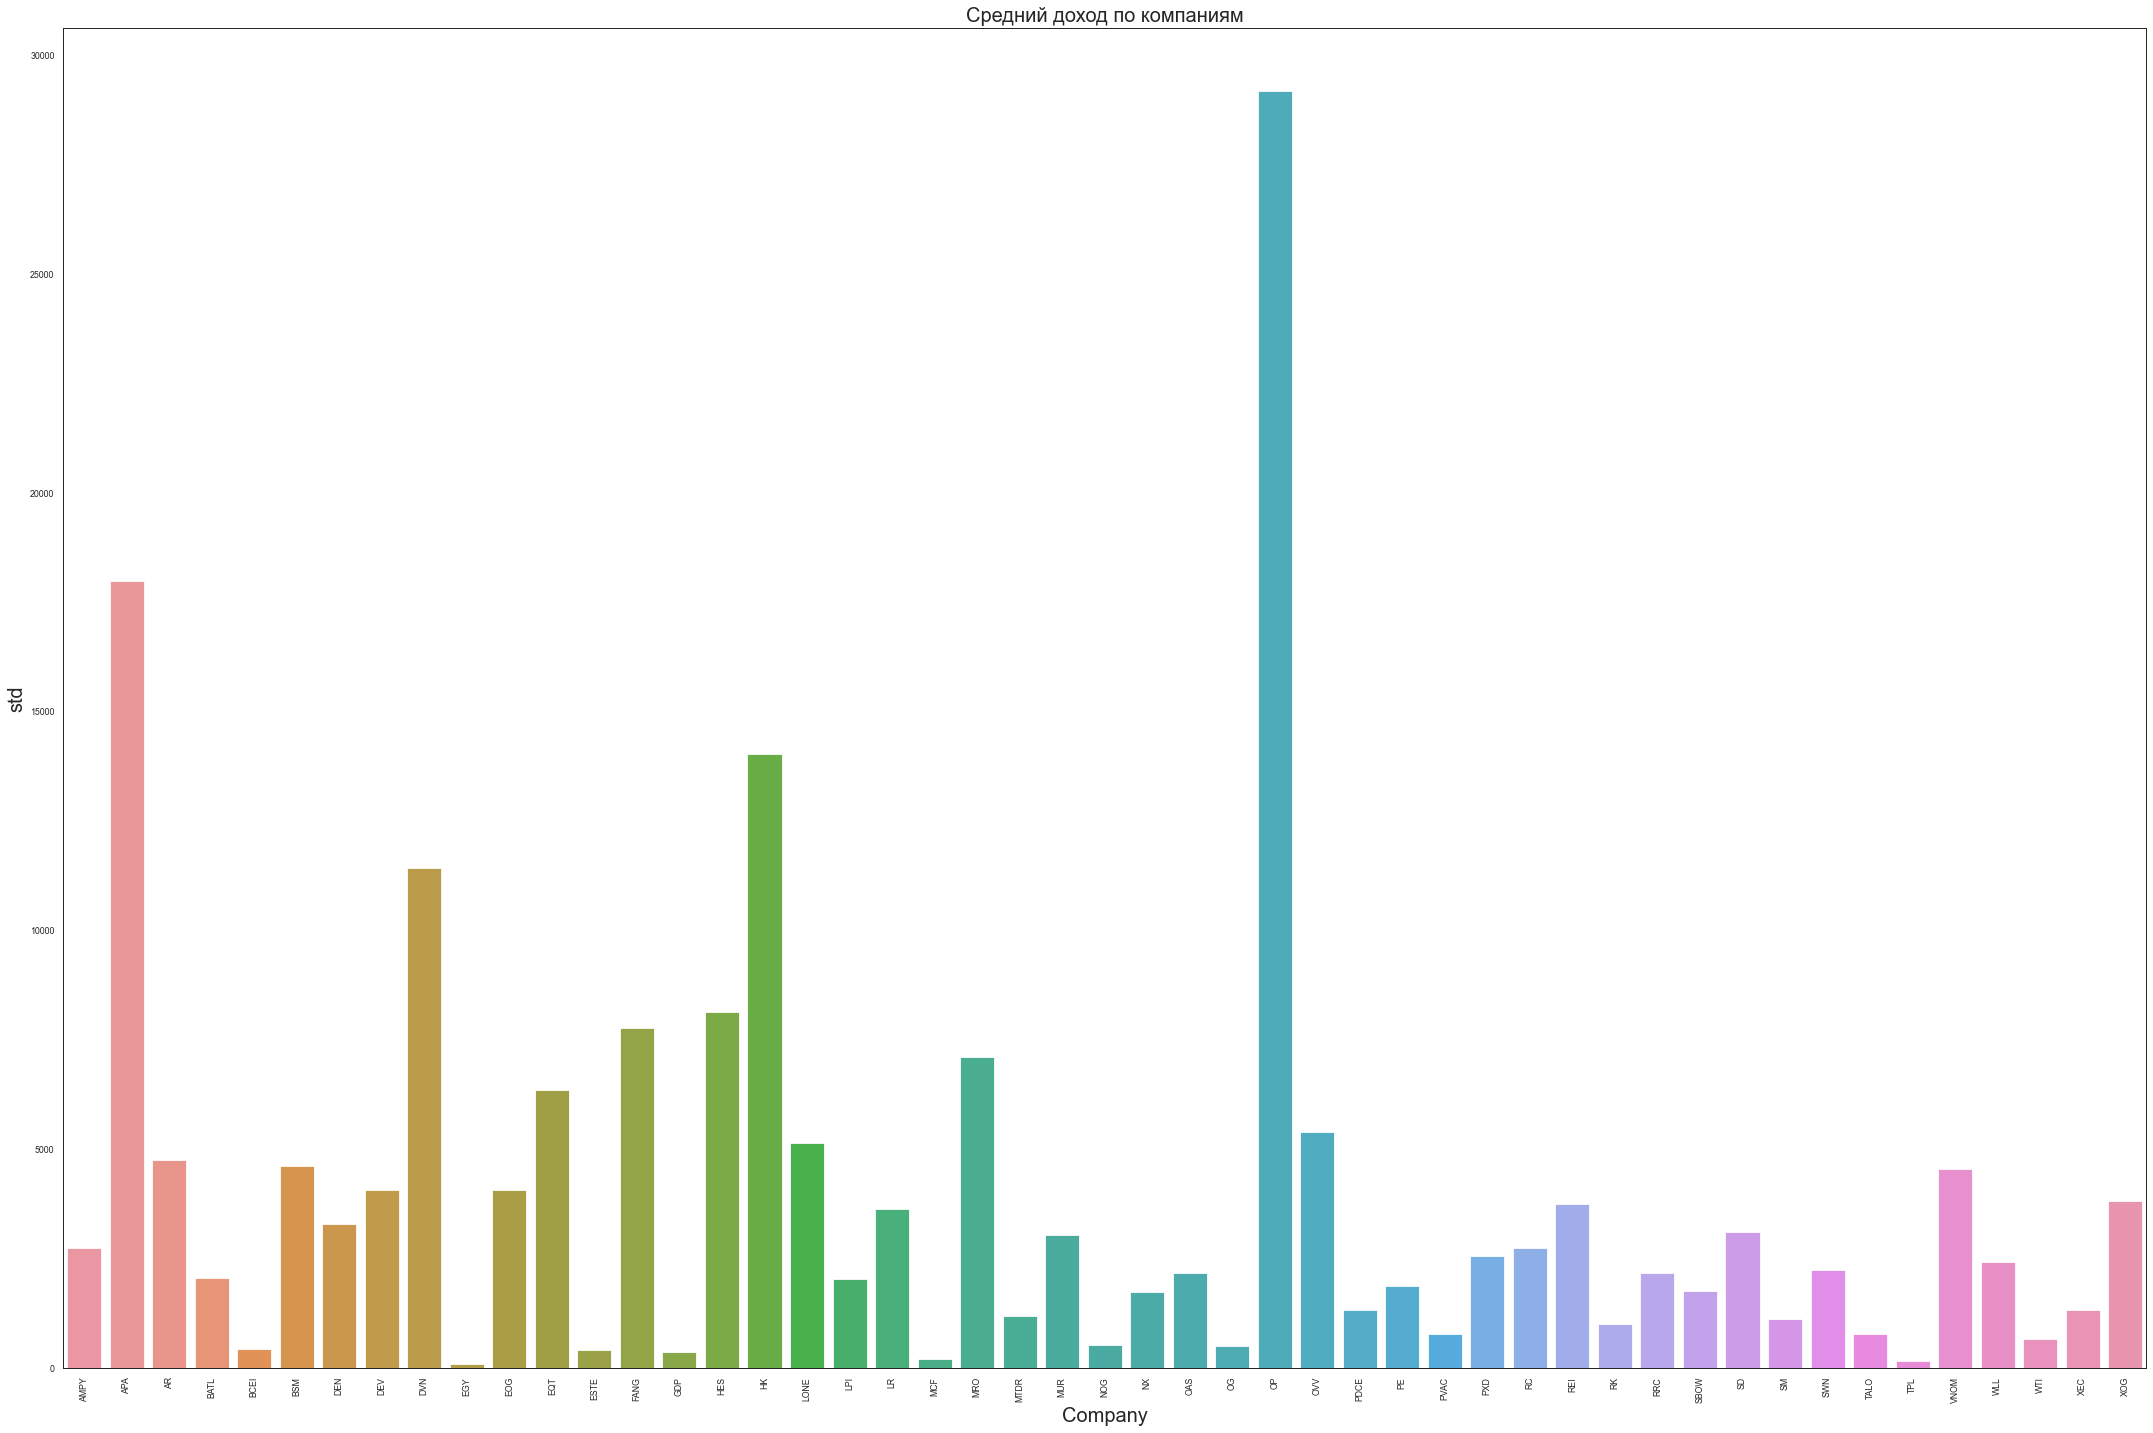

In [197]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.set_context("paper", rc={"axes.titlesize":20,"axes.labelsize":20})   
sns.barplot(data=measure4, x=measure4.index,y='std', ax=ax).set_title('Средний доход по компаниям')
plt.xticks(rotation=90)
plt.tight_layout()

In [198]:
fig = px.line(df_train, x=df_train.index, y="Total Assets",color= 'Company')
fig.show()

# Total Liabilities

In [199]:
measure5 = df_train.groupby('Company')['Total Liabilities'].describe()
measure5

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
AMPY,37.0,1449.842861,1565.964625,99.069000,205.249000,1040.428992,2049.755040,5826.450588
APA,37.0,19390.053905,6411.719924,12769.999872,13142.000128,15840.000000,26243.999744,30629.000704
AR,37.0,5557.970676,2236.796518,975.808000,3794.380928,6223.034944,6868.545920,8995.932032
BATL,37.0,1992.888568,1586.232790,257.902992,763.847024,1206.981984,3625.588992,4545.139968
BCEI,37.0,593.609809,447.959251,100.133000,204.638148,361.173192,1115.416984,1285.688992
BSM,37.0,2471.596222,2656.368105,93.929000,448.403992,566.618000,5826.450588,5826.450588
DEN,37.0,4912.080511,1264.354244,3117.646016,3806.130112,4691.108864,6095.269216,7023.945792
DEV,37.0,3293.693903,2664.873967,0.453191,612.596992,5826.450588,5826.450588,5826.450588
DVN,37.0,17557.891833,5104.869730,7104.000128,15484.000512,18324.999680,21245.000192,27719.000064


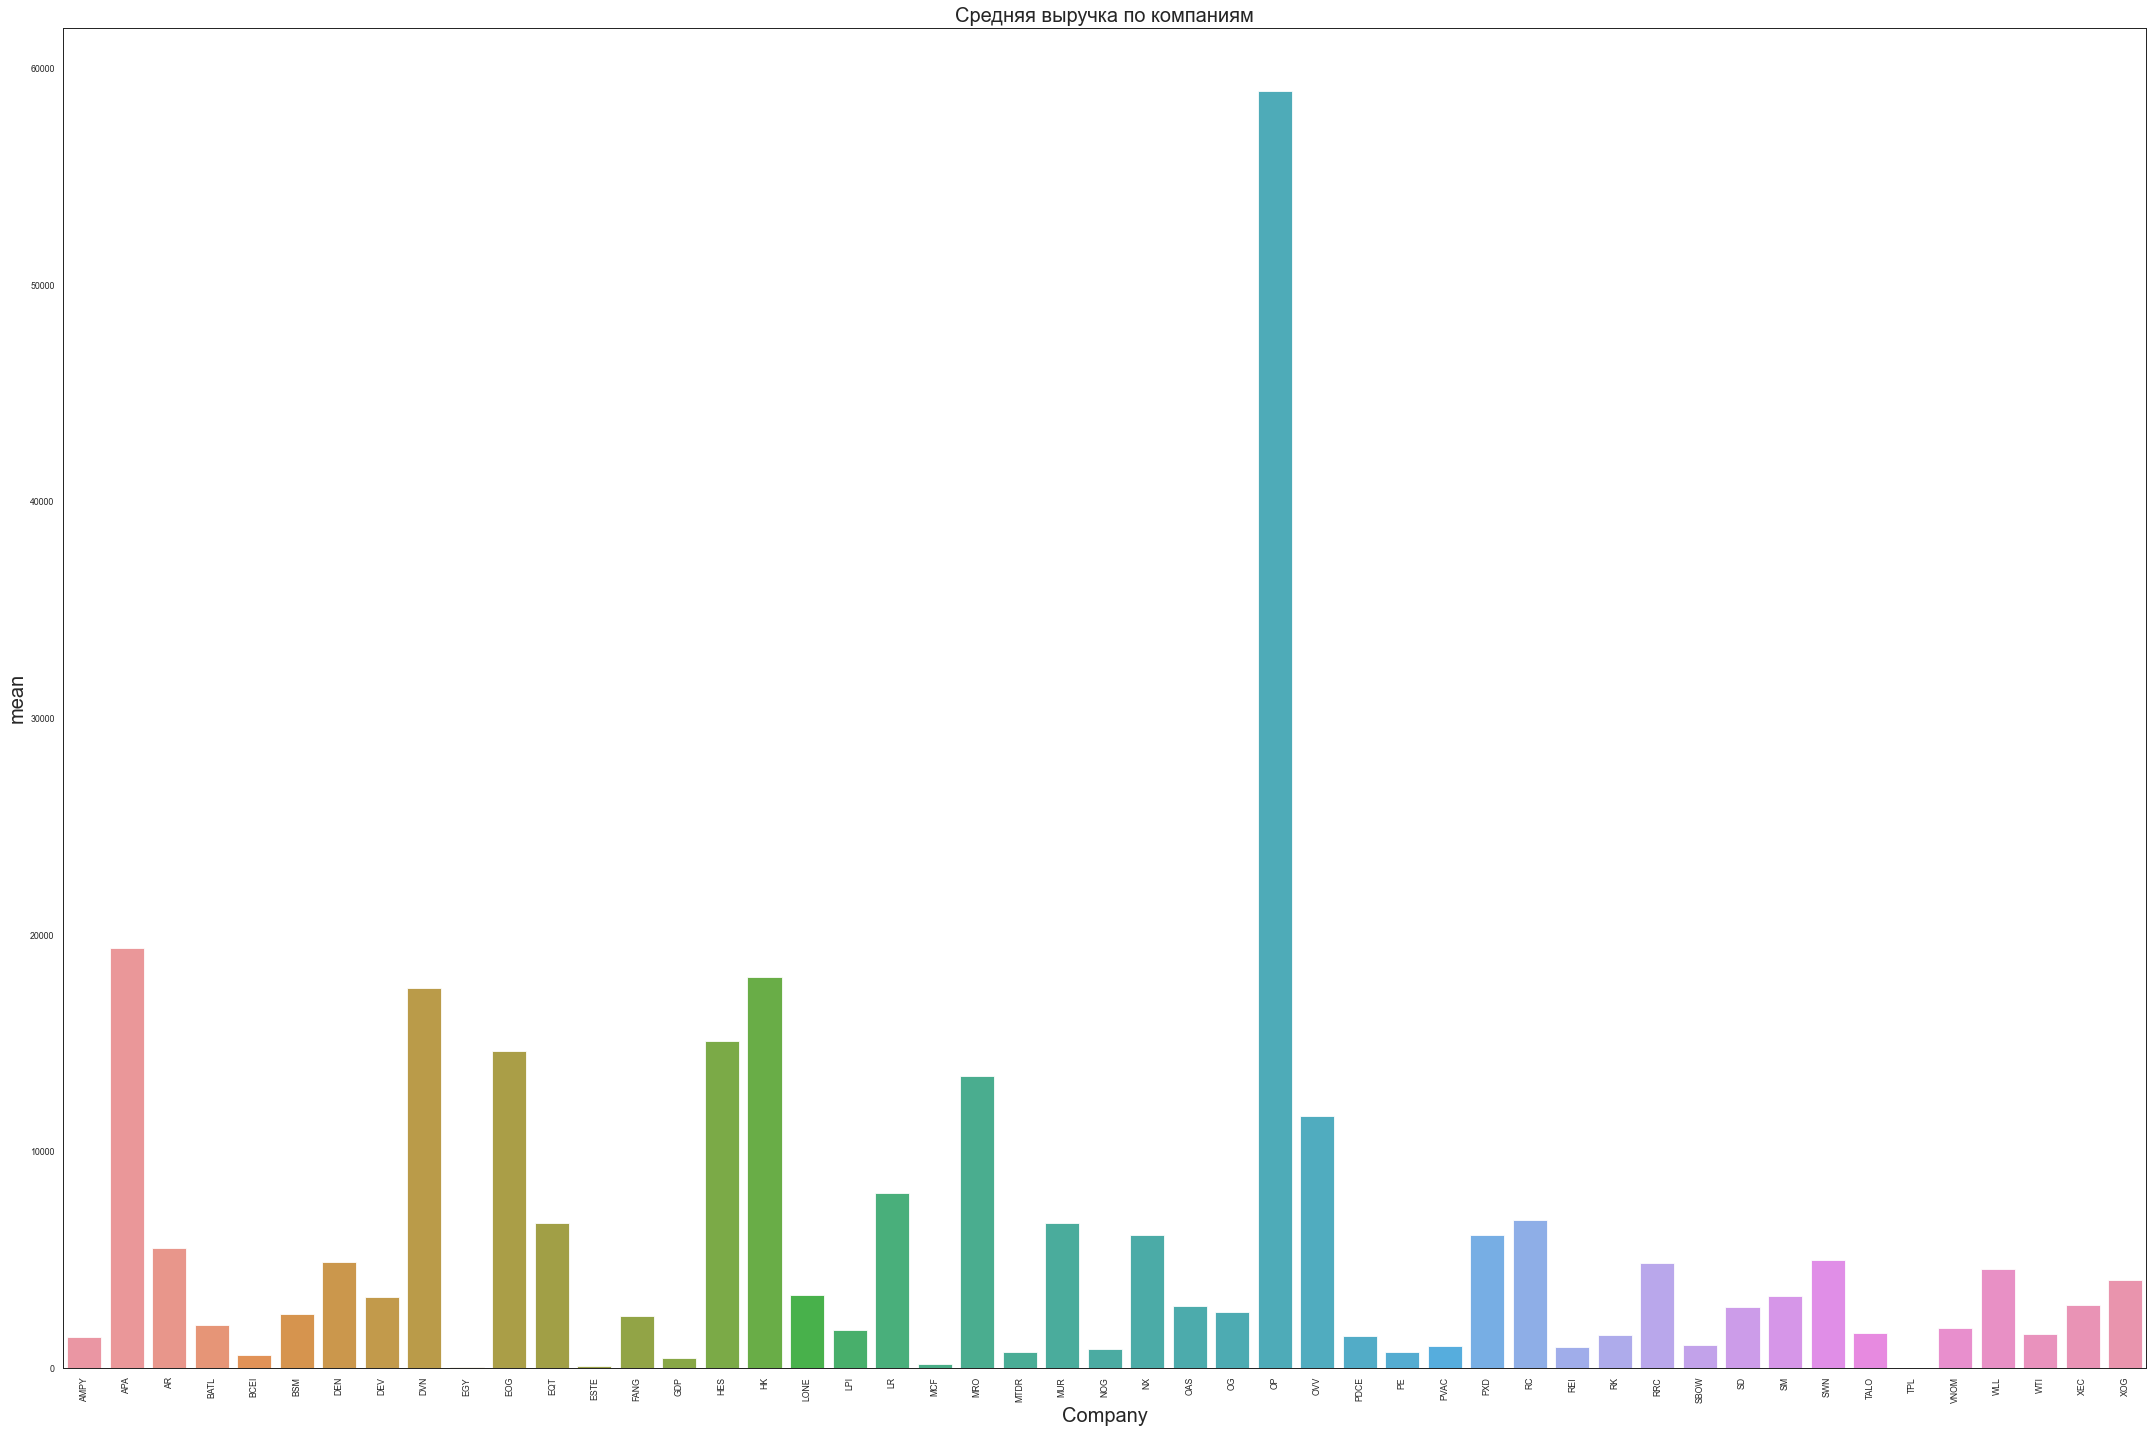

In [200]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.set_context("paper", rc={"axes.titlesize":20,"axes.labelsize":20})   
sns.barplot(data=measure5, x=measure5.index,y='mean', ax=ax).set_title('Средняя выручка по компаниям')
plt.xticks(rotation=90)
plt.tight_layout()

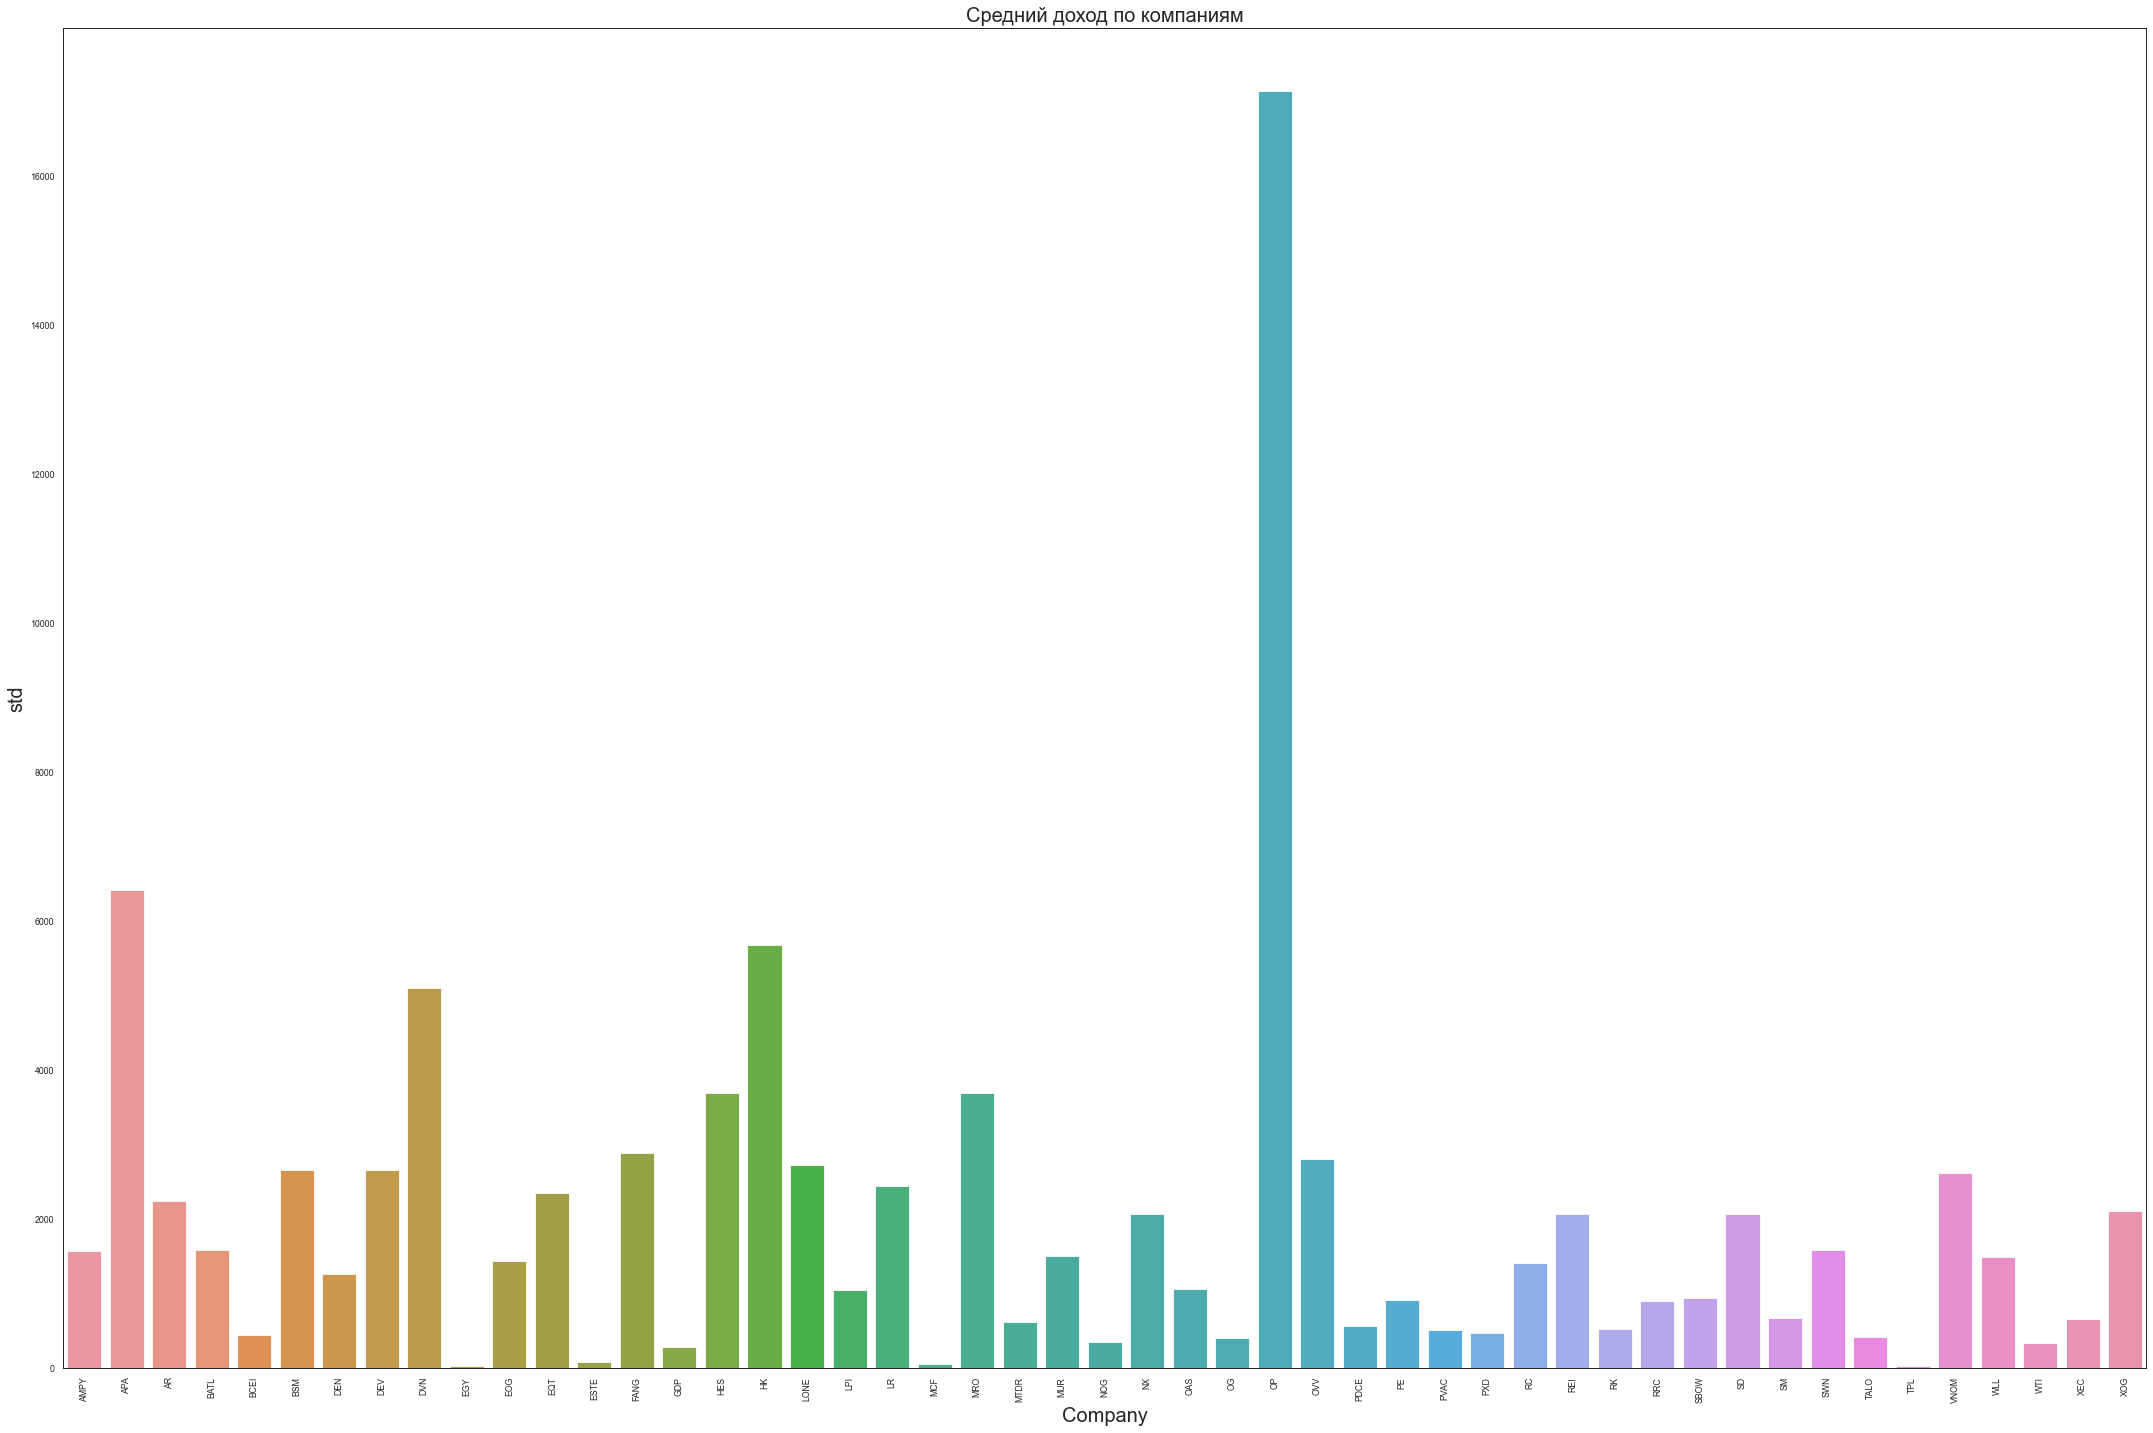

In [201]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.set_context("paper", rc={"axes.titlesize":20,"axes.labelsize":20})   
sns.barplot(data=measure5, x=measure5.index,y='std', ax=ax).set_title('Средний доход по компаниям')
plt.xticks(rotation=90)
plt.tight_layout()

In [202]:
fig = px.line(df_train, x=df_train.index, y="Total Liabilities",color= 'Company')
fig.show()

# Total Equity

In [203]:
measure6 = df_train.groupby('Company')['Total Equity'].describe()
measure6

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
AMPY,37.0,547.745181,1471.072162,-1533.090112,267.995008,437.560984,584.088984,4950.835900
APA,37.0,18395.675766,11827.831270,344.999936,8407.000704,11972.000000,30673.000704,35392.999680
AR,37.0,5746.602835,2658.966202,1507.612032,3533.037896,6592.540000,8253.952128,8921.097856
BATL,37.0,833.879826,740.539387,-672.628000,214.156992,732.028960,1315.597992,2481.824912
BCEI,37.0,596.785828,278.839201,-73.825024,527.981519,671.895008,779.550008,1016.419008
BSM,37.0,2471.373073,1965.134386,725.661008,877.795024,1117.309000,4950.835900,4950.835900
DEN,37.0,2988.957367,2100.053191,468.448000,963.183872,2136.332032,5145.880064,5703.856128
DEV,37.0,3728.781320,1504.872689,0.023000,3003.972056,4950.835900,4950.835900,4950.835900
DVN,37.0,16003.216291,6641.101793,4040.000064,10507.999744,15922.000384,21428.000256,26767.999232


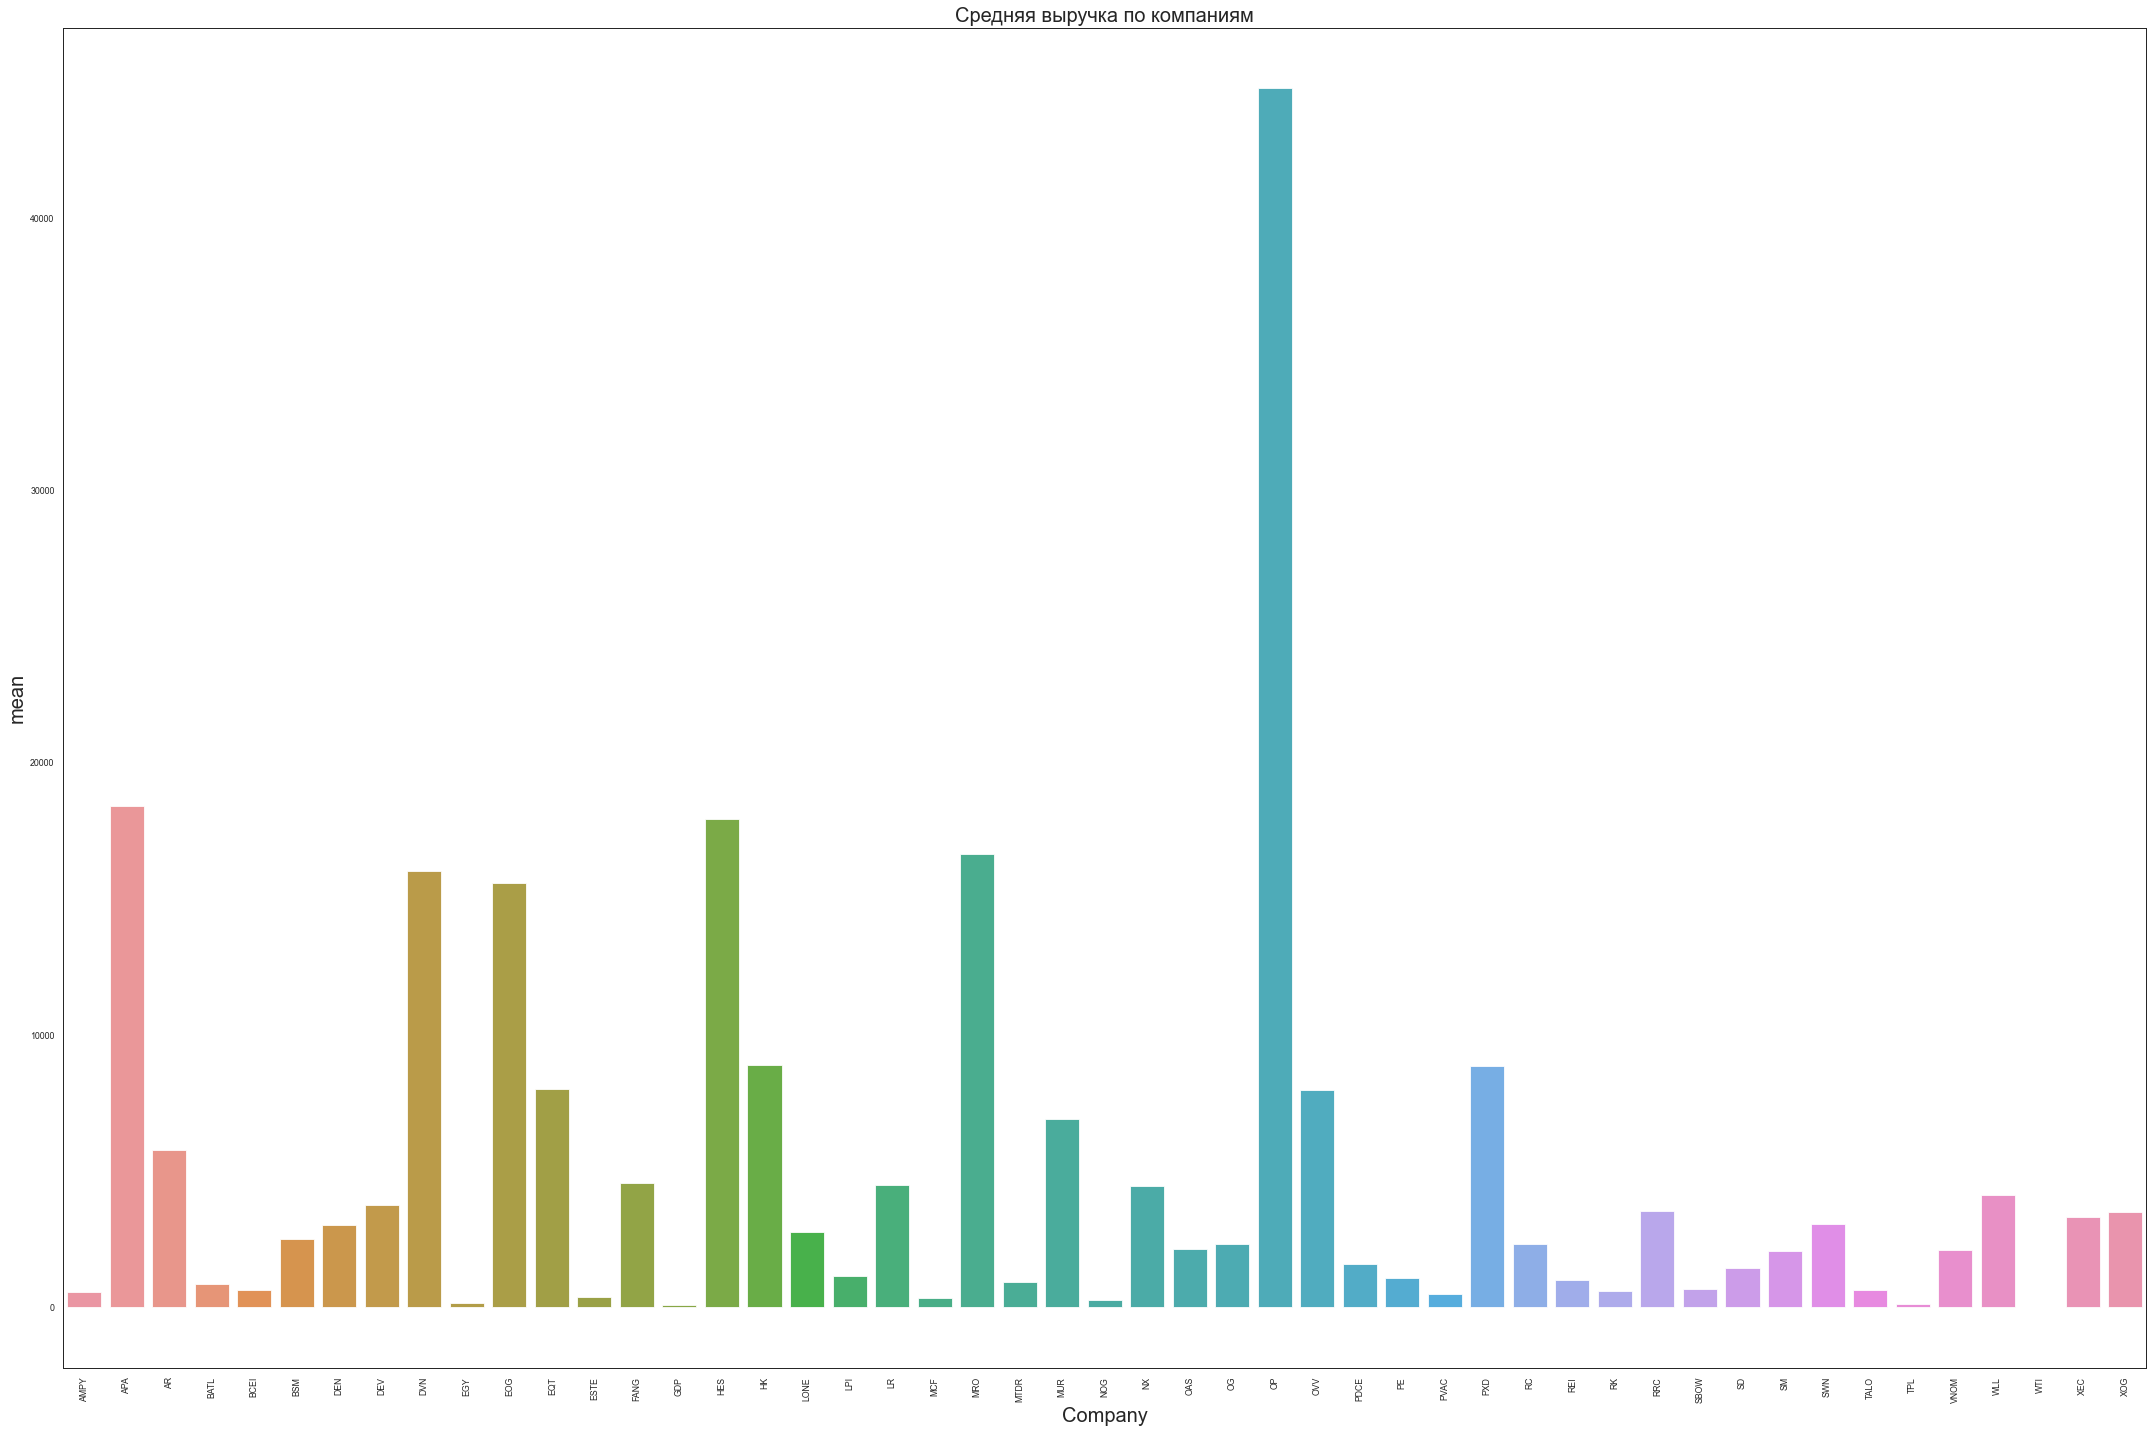

In [204]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.set_context("paper", rc={"axes.titlesize":20,"axes.labelsize":20})   
sns.barplot(data=measure6, x=measure6.index,y='mean', ax=ax).set_title('Средняя выручка по компаниям')
plt.xticks(rotation=90)
plt.tight_layout()

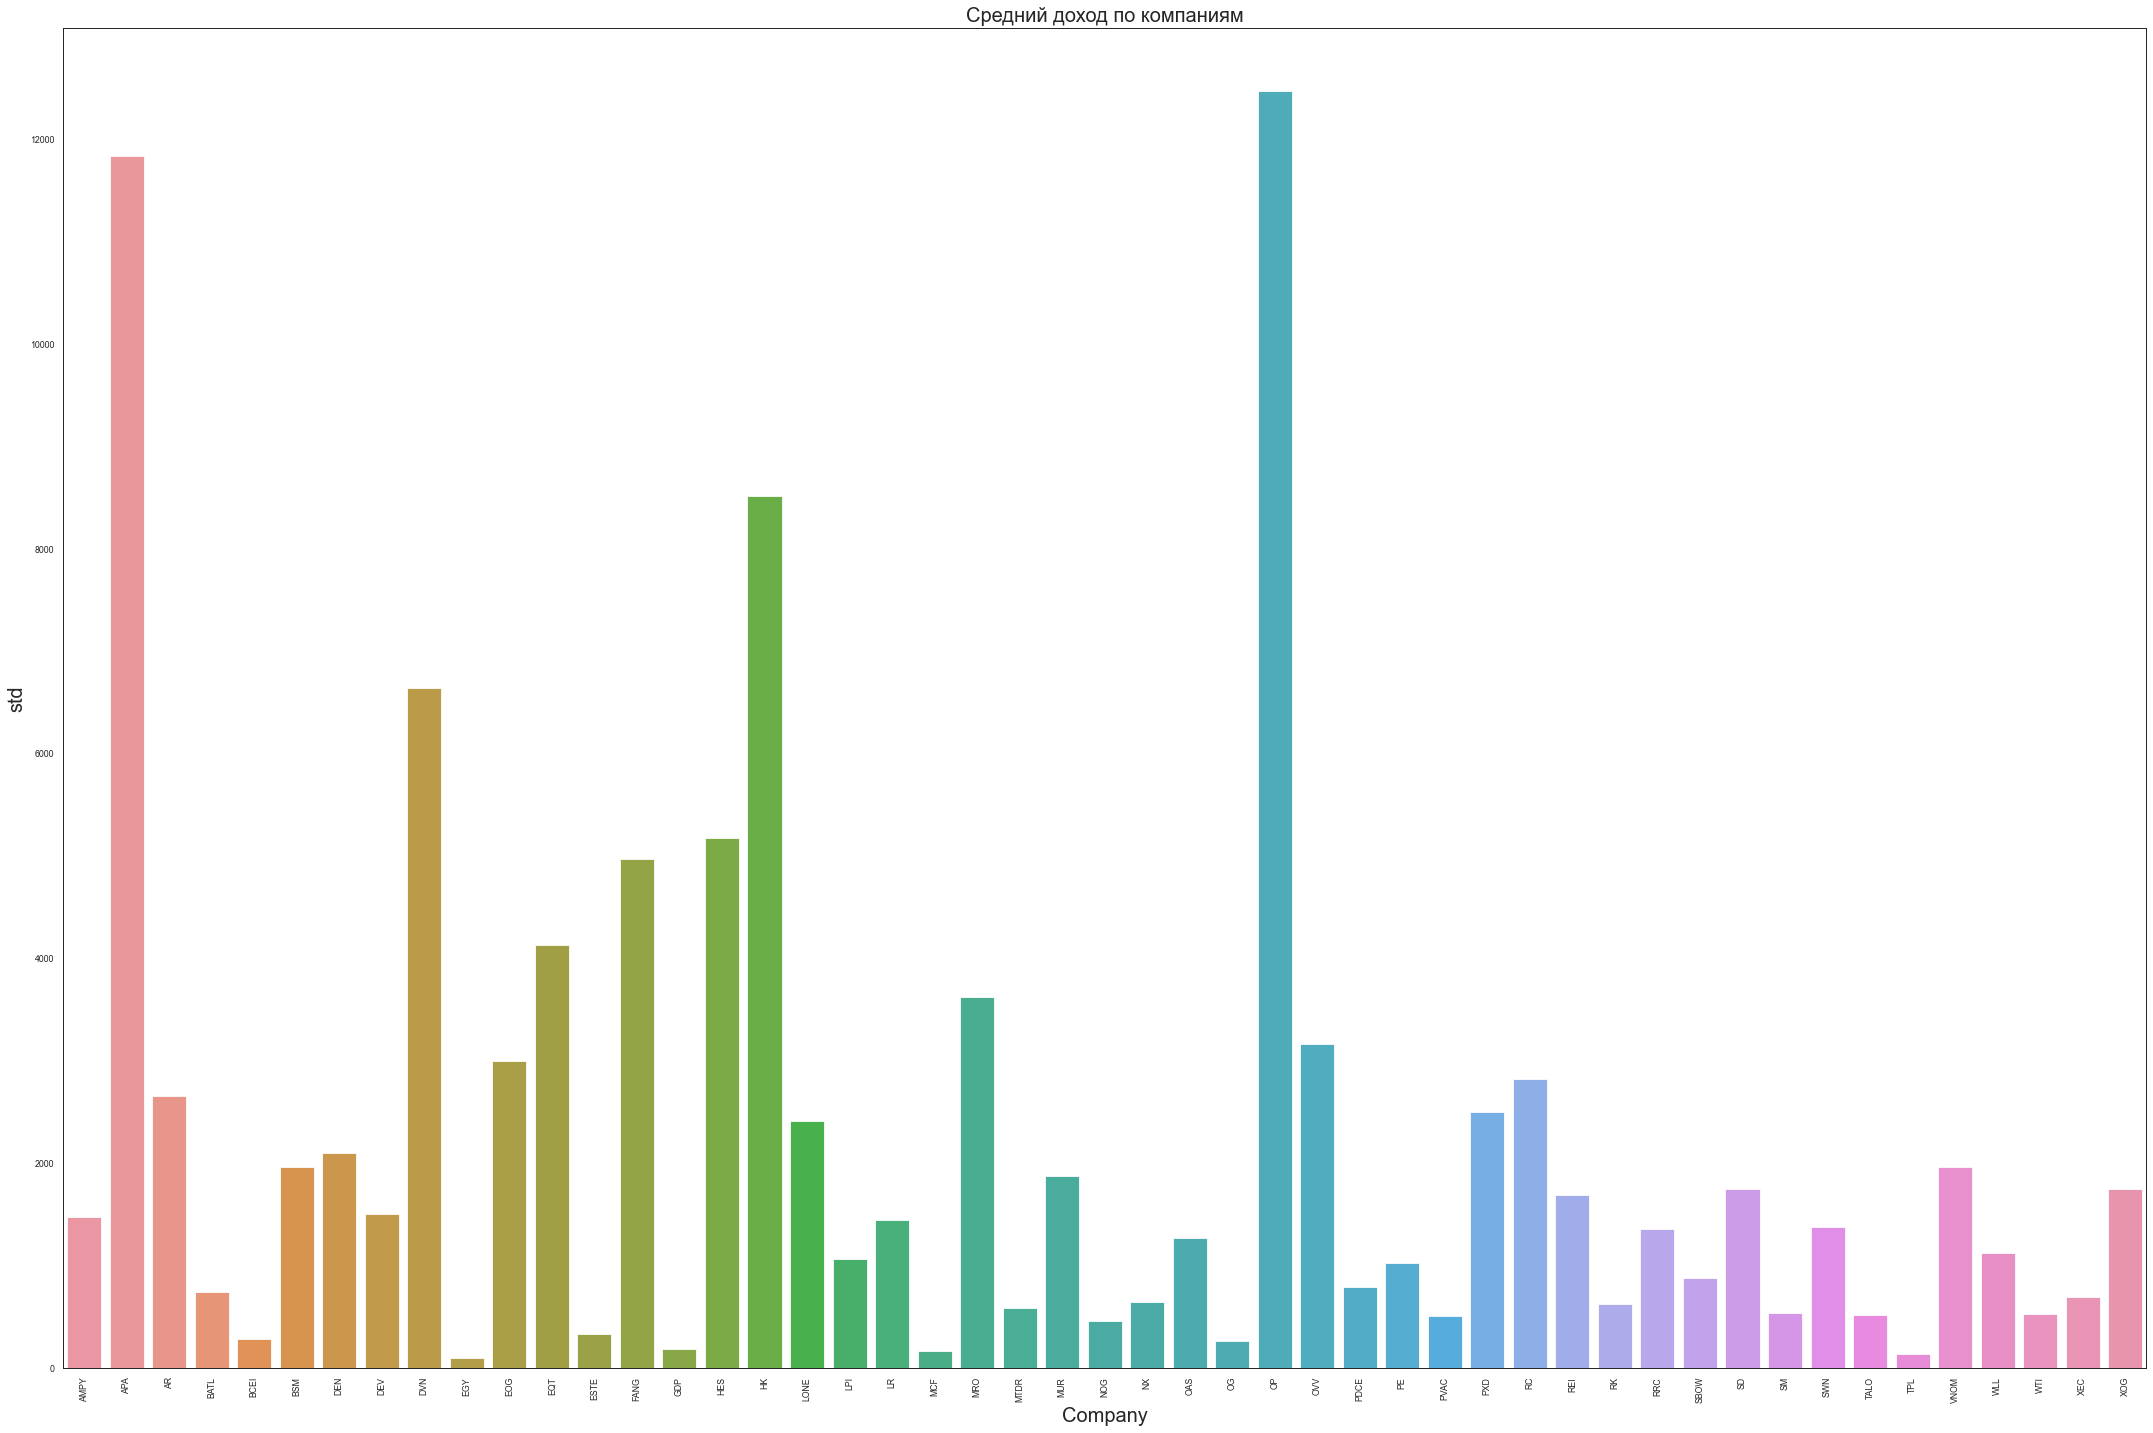

In [205]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.set_context("paper", rc={"axes.titlesize":20,"axes.labelsize":20})   
sns.barplot(data=measure6, x=measure6.index,y='std', ax=ax).set_title('Средний доход по компаниям')
plt.xticks(rotation=90)
plt.tight_layout()

In [206]:
fig = px.line(df_train, x=df_train.index, y="Total Equity",color= 'Company')
fig.show()

## Выводы:
1. Создаётся впечатление, что в общем и целом рынок довольно равномерен, но присутствуют несколько крупных игроков, таких как OP, у которого, судя по всему, больше производство, за счёт этого он лидирует по основным показателям.
2. Выручка достаточно стабильна, при этом доход показывает большую волатильность, что говорит о более волатильных издержках
3. Многие показатели сильно коррелирую друг с другом (что логично, потому что частично они получаются друг из друга). Возможно имеет смысл часть из них не учитывать, чтобы не напороться на мультиколлинеарность
4. Возможно, следует использовать дополнительные факторы: цену на нефть, например; так же на рынок нефти нефти сильно влияют соглашения на уровне государства, возможно, можно тоже как-то это учесть.

# Метрика

Можно использовать MAE. Выборку от выбросов я не чистила, так как не понятно, как это сделать на таких временных рядах (да и нужно ли). MAE же более устойчива к выбросам, чем MSE, которую обычно используют по дефолту. Однако, если мы будем применять модели типа градиентного спуска, то модуль может стать проблемой, поэтому в таком случае можно переключиться на функцию потерь Хуберта.